# **CreditScoreInsight:A Credit Score Classification Model**

**1.INTRODUCTION**

**Problem Statement**

In your role as a data scientist within a global finance corporation, you're tasked with a significant
undertaking. Over the years, the company has amassed a substantial dataset comprising essential
banking details and an extensive repository of credit-related data.
Driven by the need for enhanced efficiency and accuracy, the company's management has initiated
a forward-looking project.

The objective is to develop an intelligent system employing data science
and machine learning to automate the categorization of individuals into specific credit score
brackets.
o create a predictive model that categorizes customers
into three creditworthiness levels: Good, Standard, and Poor. This model will be a valuable tool for
banks and financial institutions to make informed decisions about loan approvals and risk
assessment.

**2.DATA PREPARATION**

**2.1 Import Libraries**

In [178]:
# Packages for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import skew
# Packages for Data Preprocessing
from sklearn.preprocessing import StandardScaler
#Packages for  Modeling and evaluation
from sklearn.model_selection import train_test_split
#To ignore future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [179]:
pd.options.mode.copy_on_write = True

**2.2 Loading Files**

In [181]:
data=pd.read_csv('/content/credit.csv')


In [182]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


**2.3 Data Profiling**

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [184]:
# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Print numerical columns
print("Numerical Columns:")
print(numerical_columns)
# Print categorical columns
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

Categorical Columns:
['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


**Dataset Description**

This dataset contains information on 100,000 customers' financial and credit activities. It includes 28 attributes .

**a.Columns**

ID: Unique record identifier.

Customer_ID: Unique identifier for each customer.

Month: Reporting month.

Name: Customer's name.

Age: Customer's age.

SSN: Customer's Social Security Number.

Occupation: Customer's occupation.

Annual_Income: Yearly income.

Monthly_Inhand_Salary: Monthly take-home salary.

Num_Bank_Accounts: Number of bank accounts.

Num_Credit_Card: Number of credit cards.

Interest_Rate: Applicable interest rate.

Num_of_Loan: Number of loans.

Type_of_Loan: Types of loans held.

Delay_from_due_date: Average days payments are delayed.

Num_of_Delayed_Payment: Count of delayed payments.

Changed_Credit_Limit: Change in credit limit.

Num_Credit_Inquiries: Number of credit inquiries.

Credit_Mix: Variety of credit accounts.

Outstanding_Debt: Total debt owed.

Credit_Utilization_Ratio: Ratio of credit used to credit available.

Credit_History_Age: Age of credit history (months).

Payment_of_Min_Amount: Indicates if only minimum payments are made.

Total_EMI_per_month: Total monthly EMI payments.

Amount_invested_monthly: Monthly investments.

Payment_Behaviour: Spending and payment patterns.

Monthly_Balance: End-of-month balance.

Credit_Score: Credit score category (Good, Standard, Poor).

 **b.Types of column**

ID,Customer_ID, 'SSN','Name' -These are unique identifiers.

1. Discrete Columns:
These columns represent distinct, countable values.

'ID', 'Customer_ID', 'Month'

2. Continuous Columns:
These columns represent measurable quantities and can take on any value within a range.

'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'

3. Categorical Columns:
These columns represent categories or groups and are typically non-numeric.

Name,
Occupation,
Type_of_Loan,
Credit_Mix,
Payment_of_Min_Amount,
Payment_Behaviour,
Credit_Score,



**3.DATA CLEANING**

**3.1 Handle Missing Values**

In [185]:
# Columns to remove
irrelevant_columns = ['ID', 'Customer_ID', 'SSN','Name']# These are unique identifiers &doesn't add value to our prediction.

# Drop irrelevant columns
data = data.drop(columns=irrelevant_columns)

In [186]:
columns_to_convert = ["Occupation", "Type_of_Loan", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour","Credit_Score"]
data[columns_to_convert] = data[columns_to_convert].astype("category")#to convert from obj to category


In [187]:
data.isnull().sum() #checking for missing values

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

No missing values,hence no need of imputation.

**3.2 Handle Duplicate Values**

In [188]:
data.duplicated().sum()

0

There are no duplicates in the data.

**4.EDA**

In [189]:
data.describe()# Summary statistics

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.500000,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,2.291299,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,1.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,2.750000,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,4.500000,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,6.250000,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,8.000000,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


**4.1 Univariate Analysis**

**Target column**

In [190]:
# Define color mapping for Credit Score categories
palette= {'Poor': 'red', 'Standard': 'yellow', 'Good': 'green'}

Value counts of Credit Score:
Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


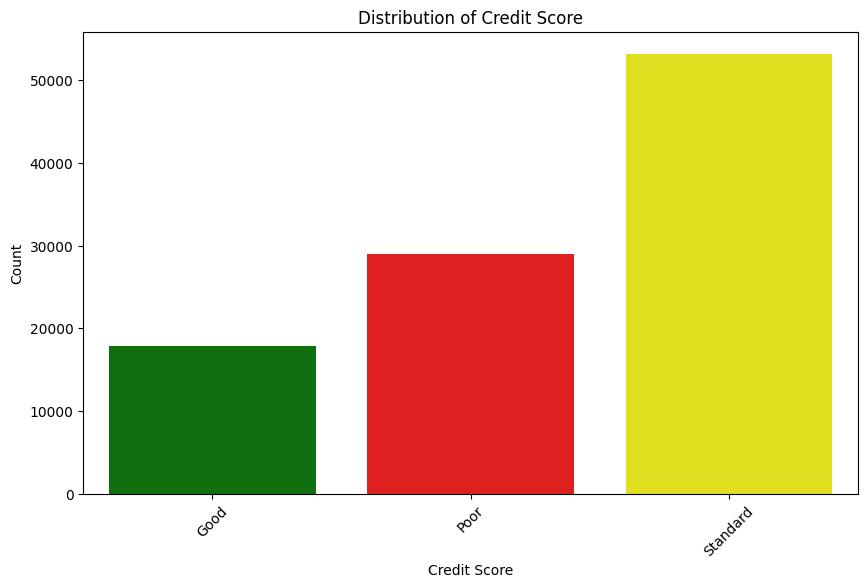

In [191]:
# Map colors to a new column in the data
data['Color'] = data['Credit_Score'].map(palette)

# Display the unique values and their counts in the target column
print("Value counts of Credit Score:")
print(data['Credit_Score'].value_counts())

# 1. Distribution of the Target Column
plt.figure(figsize=(10, 6))

# Use the mapped colors for plotting
sns.countplot(x='Credit_Score', data=data, palette=palette,hue='Credit_Score',legend=False)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Categorical columns**

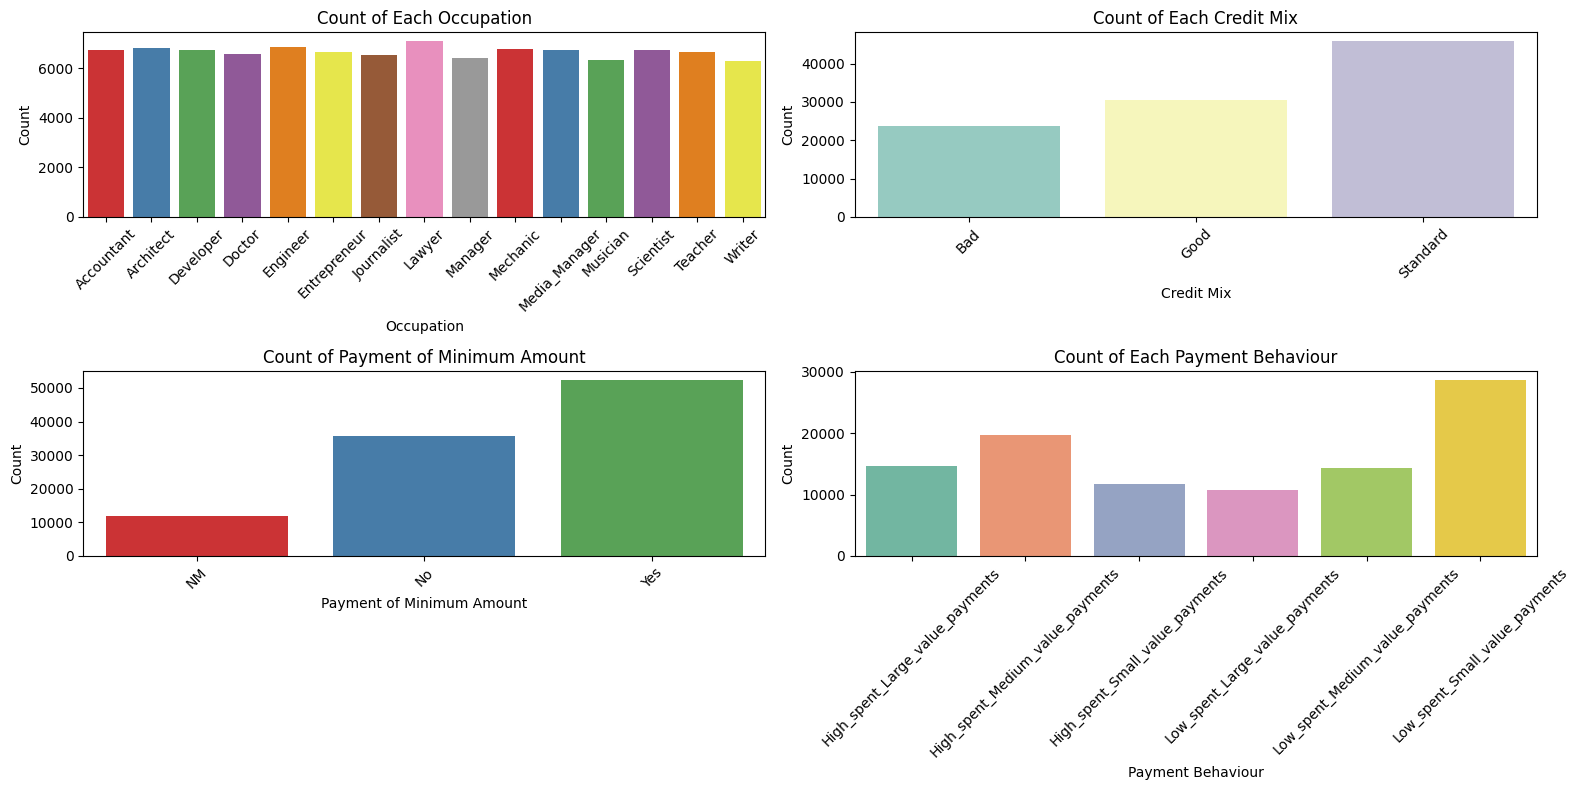

In [192]:
# Define figure size for all plots
figsize = (16, 8)

# Plot for Occupation
plt.figure(figsize=figsize)
plt.subplot(2, 2, 1)
sns.countplot(x='Occupation', hue='Occupation', data=data, palette='Set1', dodge=False, legend=False)
plt.title('Count of Each Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for Credit_Mix
plt.subplot(2, 2, 2)
sns.countplot(x='Credit_Mix', hue='Credit_Mix', data=data, palette='Set3', dodge=False, legend=False)
plt.title('Count of Each Credit Mix')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for Payment_of_Min_Amount
plt.subplot(2, 2, 3)
sns.countplot(x='Payment_of_Min_Amount', hue='Payment_of_Min_Amount', data=data, palette='Set1', dodge=False, legend=False)
plt.title('Count of Payment of Minimum Amount')
plt.xlabel('Payment of Minimum Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for Payment_Behaviour
plt.subplot(2, 2, 4)
sns.countplot(x='Payment_Behaviour', hue='Payment_Behaviour', data=data, palette='Set2', dodge=False, legend=False)
plt.title('Count of Each Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

All occupations have a similar count, indicating a balanced dataset in terms of occupation distribution.

 Credit mix, categorized as Bad, Good, or Standard. The 'Standard' category has the highest count, followed by 'Good' and 'Bad'.

 Third  chart shows how many individuals pay the minimum amount required. The categories are NM (Not Mentioned), No, and Yes. Most individuals either do not pay the minimum amount or do pay it, with a smaller number of individuals falling into the NM category.

 Fourth chart shows the distribution of individuals based on their payment behavior. The behaviors are categorized based on spending and payment patterns. The 'Low_spent_Small_value_payments' category has the highest count, while the 'High_spent_Small_value_payments' has the lowest.

In [193]:

# Calculate the number of unique values in 'Type_of_Loan'
num_unique_types_of_loan = data['Type_of_Loan'].nunique()

# Print the result
print(f'Number of unique types of loan: {num_unique_types_of_loan}')

Number of unique types of loan: 6261


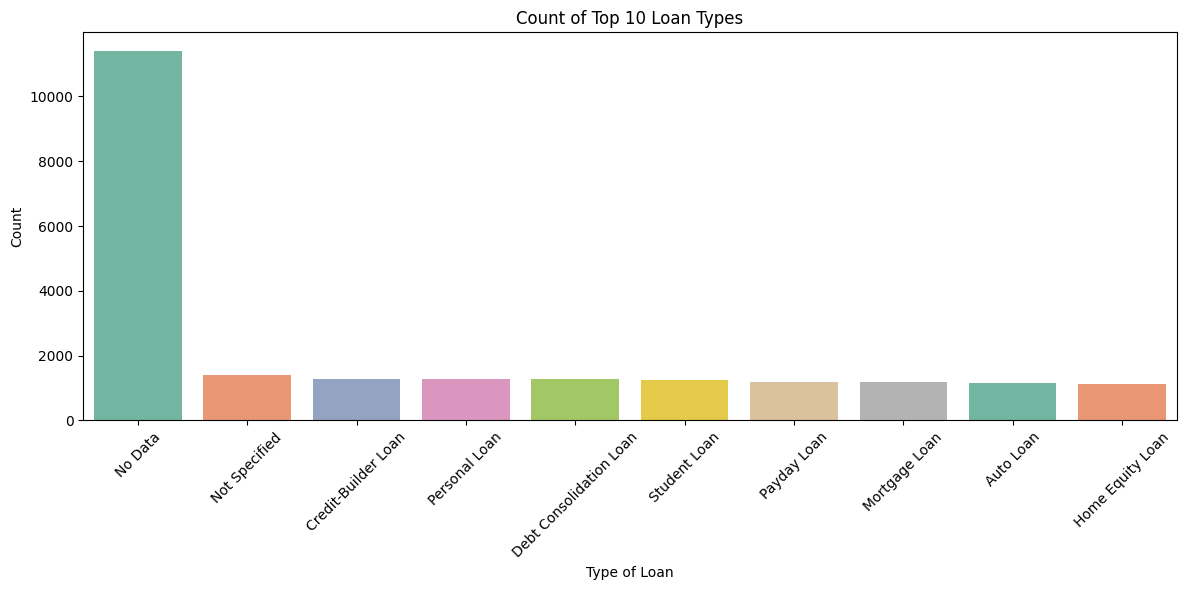

In [194]:
# Define figure size for the plot
figsize = (12, 6)

# Calculate value counts for Type_of_Loan and get the top 10
type_of_loan_counts = data['Type_of_Loan'].value_counts().nlargest(10)

# Filter the dataset to include only the top 10 loan types
top_10_loans = type_of_loan_counts.index
filtered_data = data[data['Type_of_Loan'].isin(top_10_loans)]

# Plot count of top 10 loan types
plt.figure(figsize=figsize)
sns.countplot(x='Type_of_Loan', data=filtered_data, palette='Set2', order=top_10_loans)
plt.title('Count of Top 10 Loan Types')
plt.xlabel('Type of Loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()  # Ensure tight layout

plt.show()

It has  6261 unique values.Overall, the chart highlights that a significant portion of the data lacks specific loan type information, either labeled as "No Data" or "Not Specified." Among the specified loan types, none stand out with particularly high counts, suggesting a relatively even distribution among the different types listed.

**Other Numerical columns**

Skewness of Month: 0.00


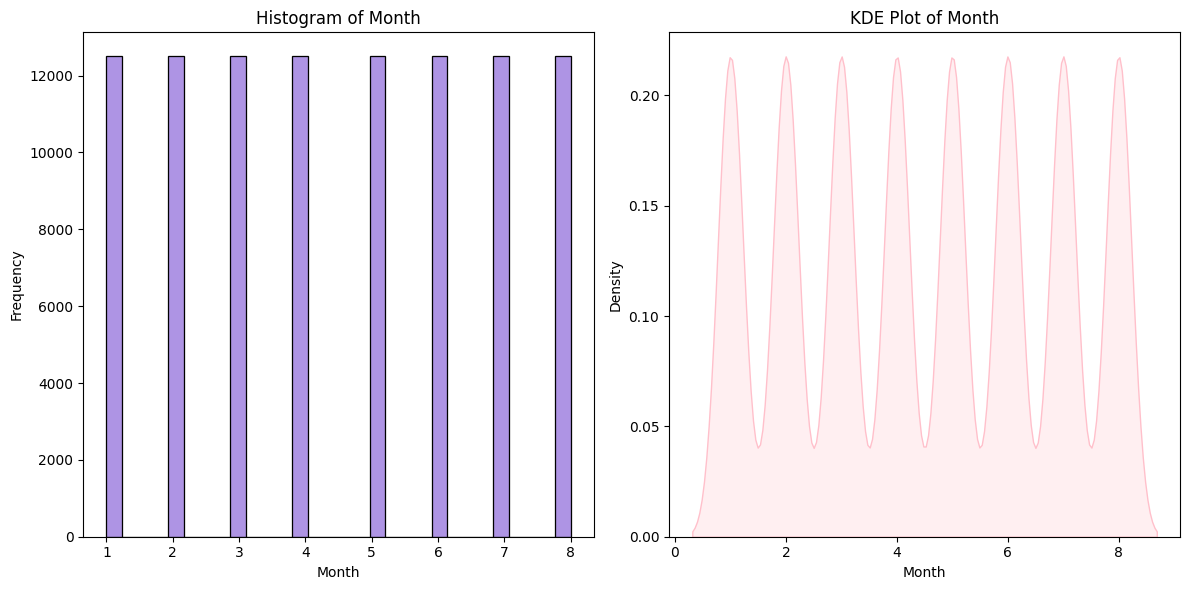

Skewness of Age: 0.16


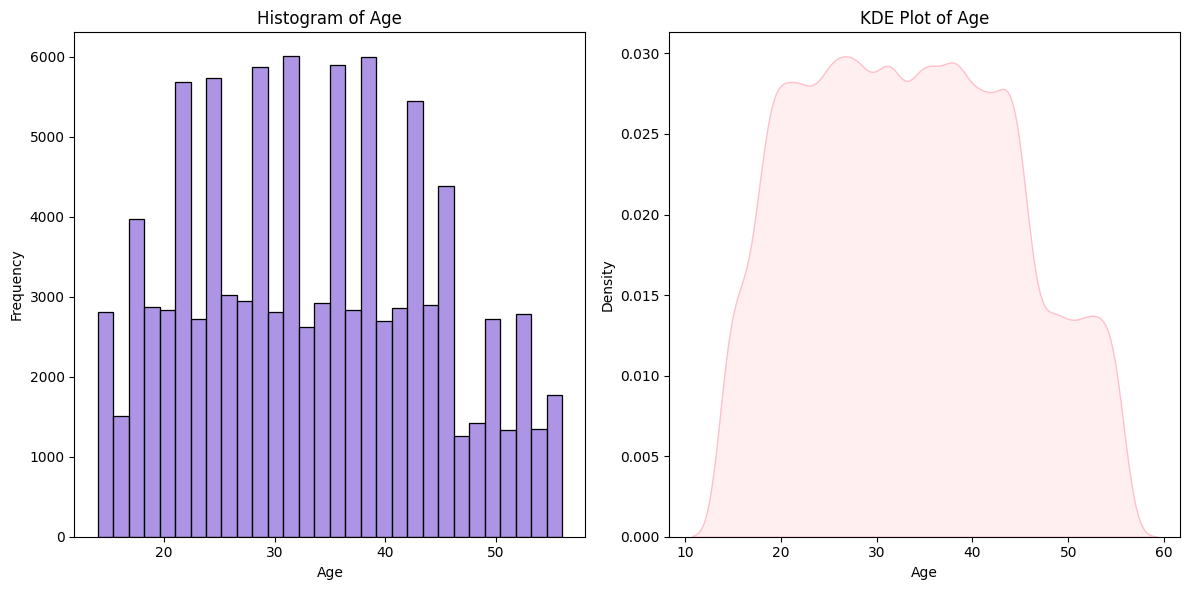

Skewness of Num_Bank_Accounts: -0.19


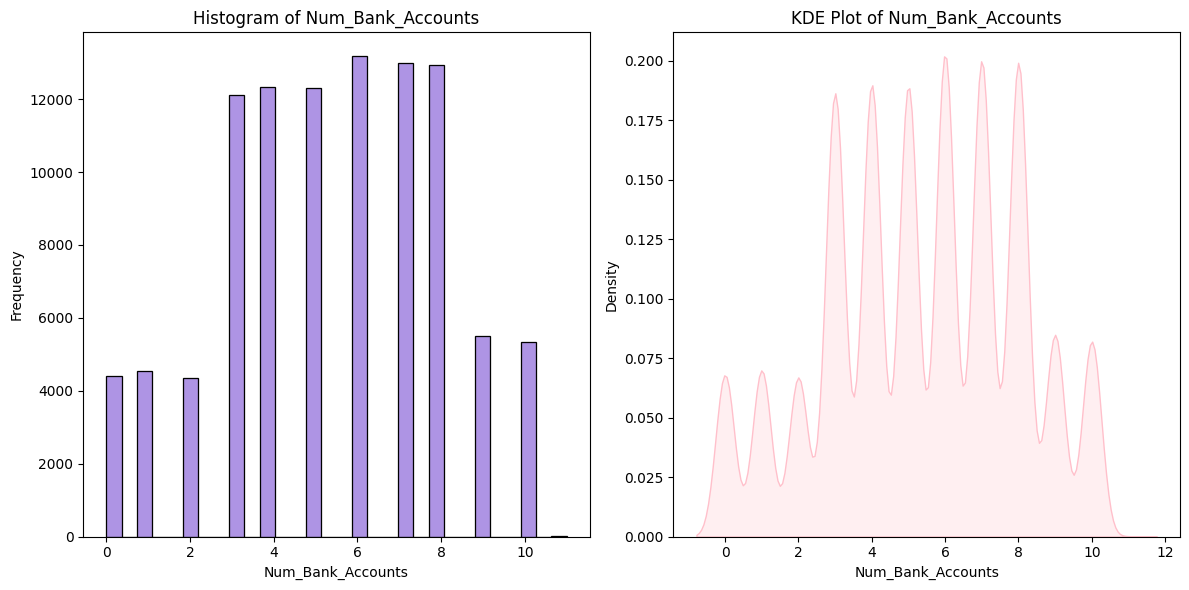

Skewness of Num_Credit_Card: 0.23


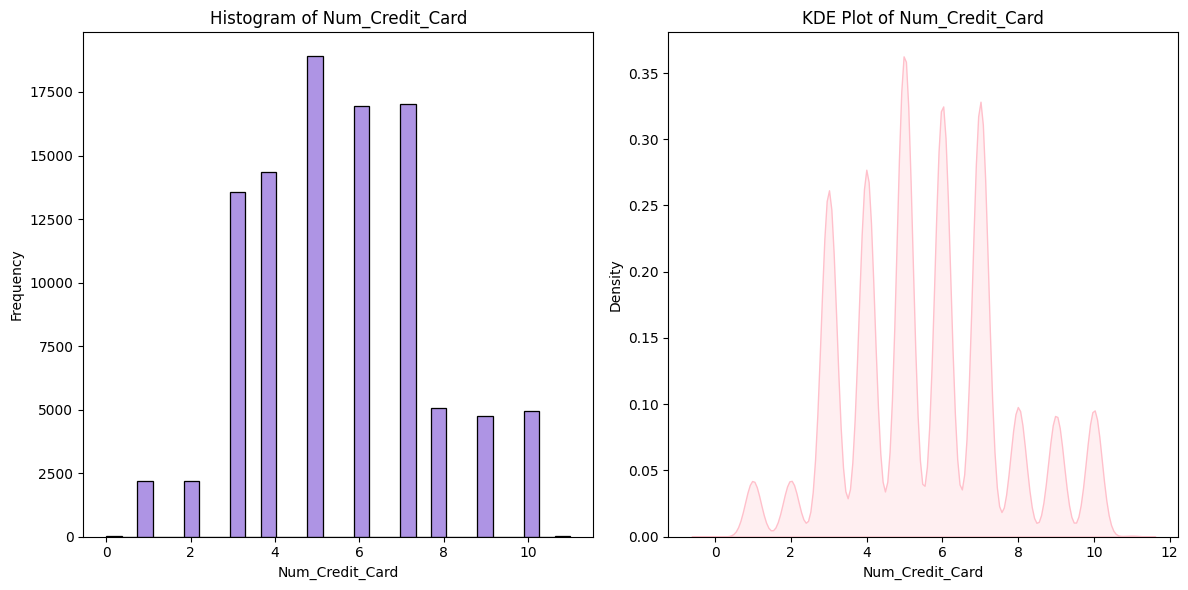

Skewness of Interest_Rate: 0.50


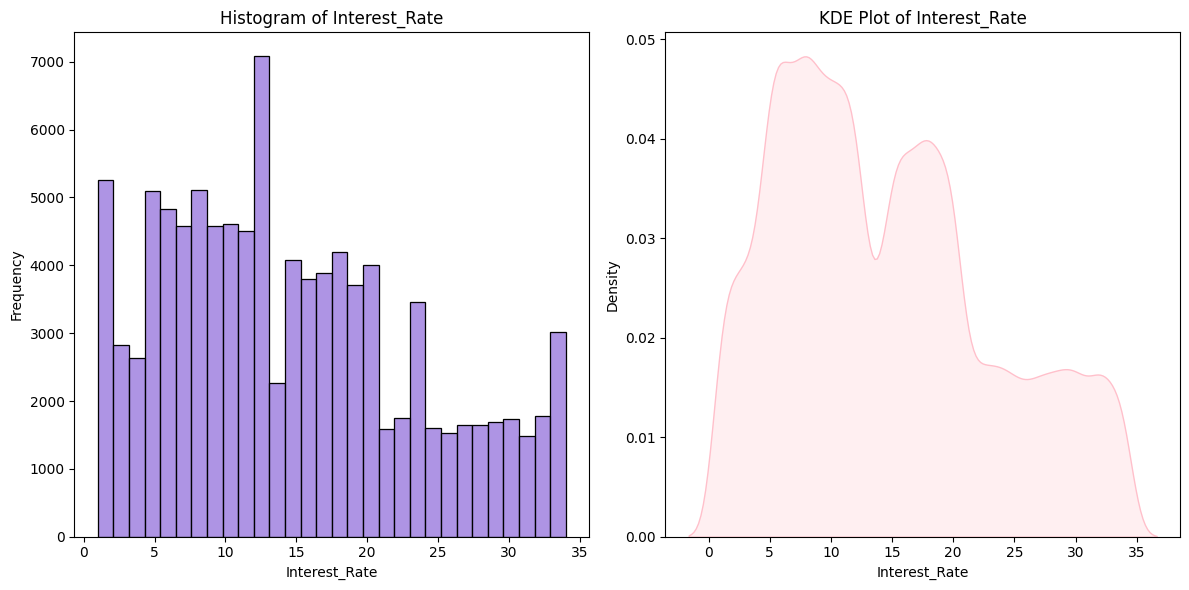

Skewness of Num_of_Loan: 0.45


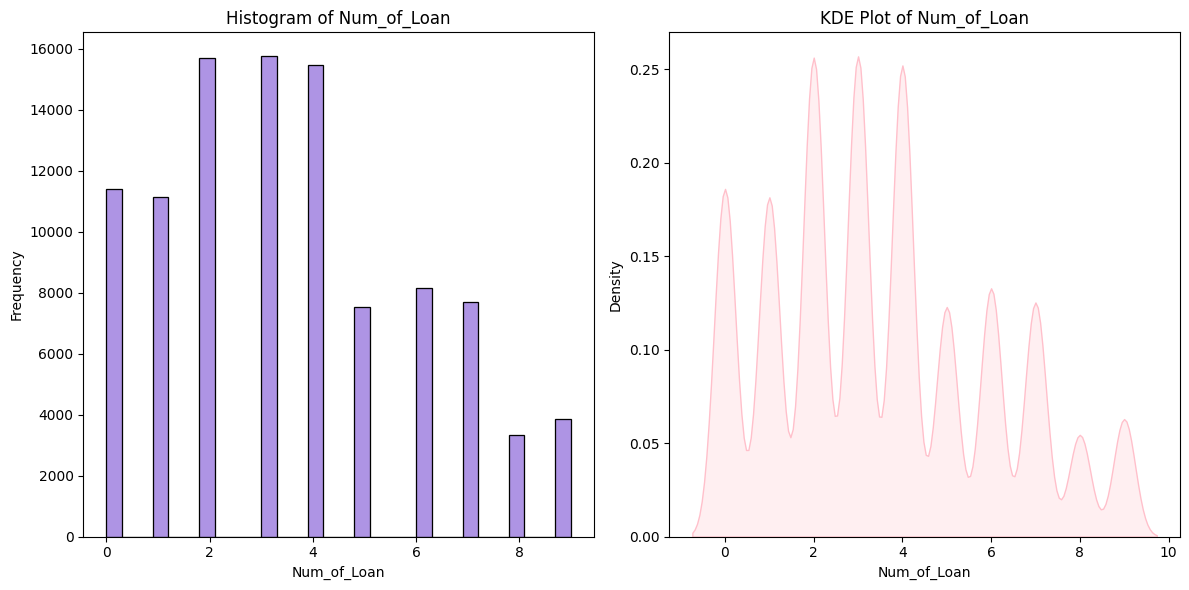

Skewness of Delay_from_due_date: 0.97


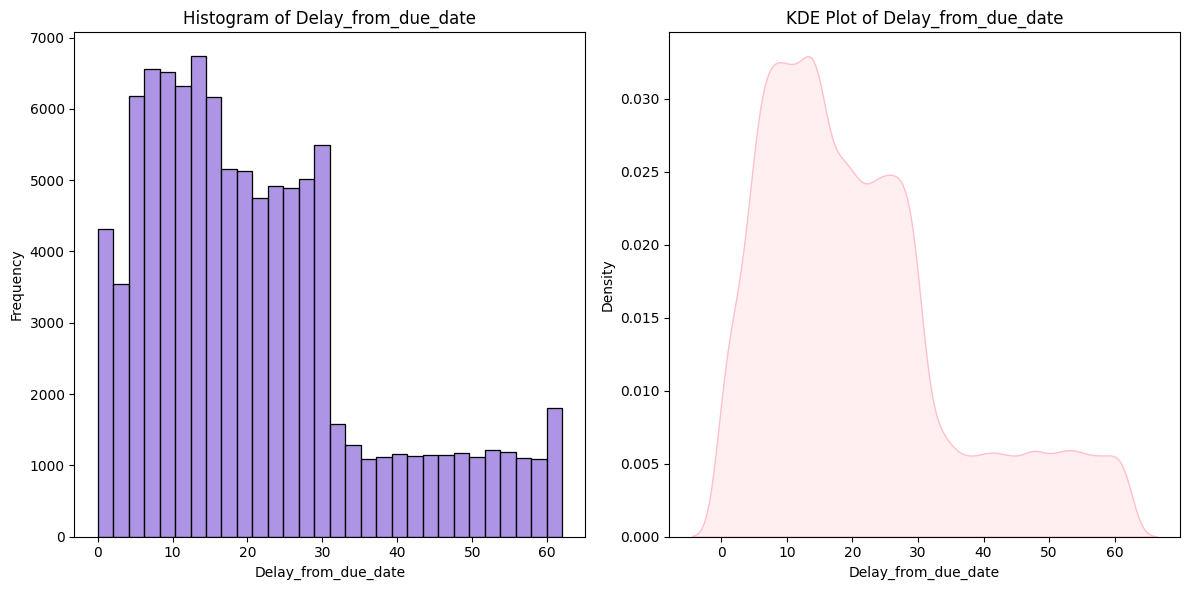

Skewness of Num_of_Delayed_Payment: -0.21


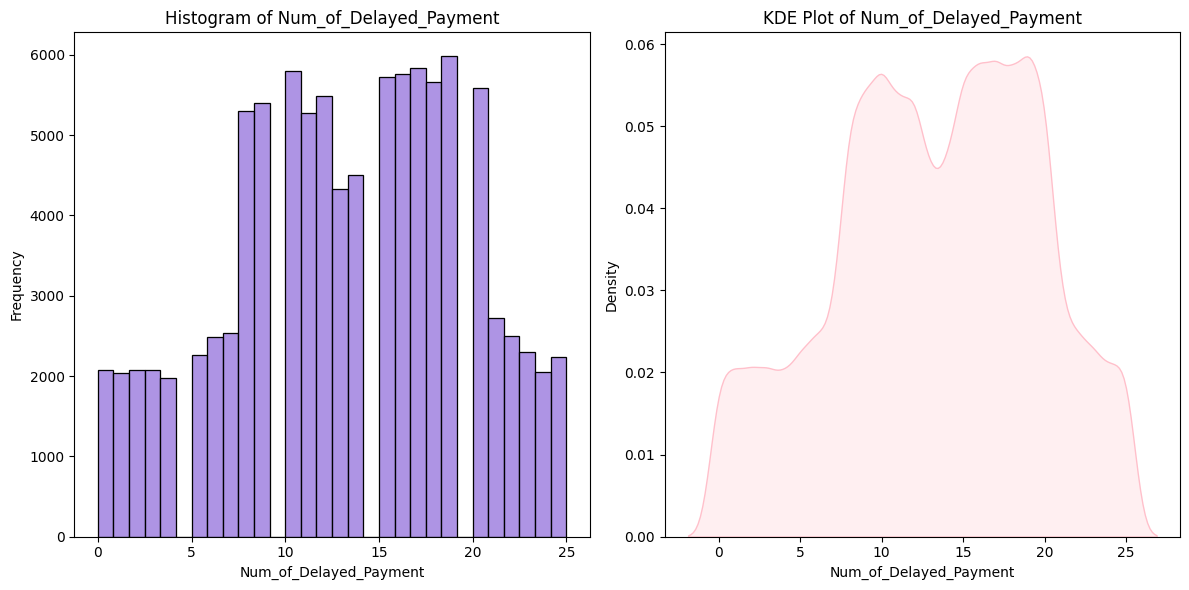

Skewness of Changed_Credit_Limit: 0.71


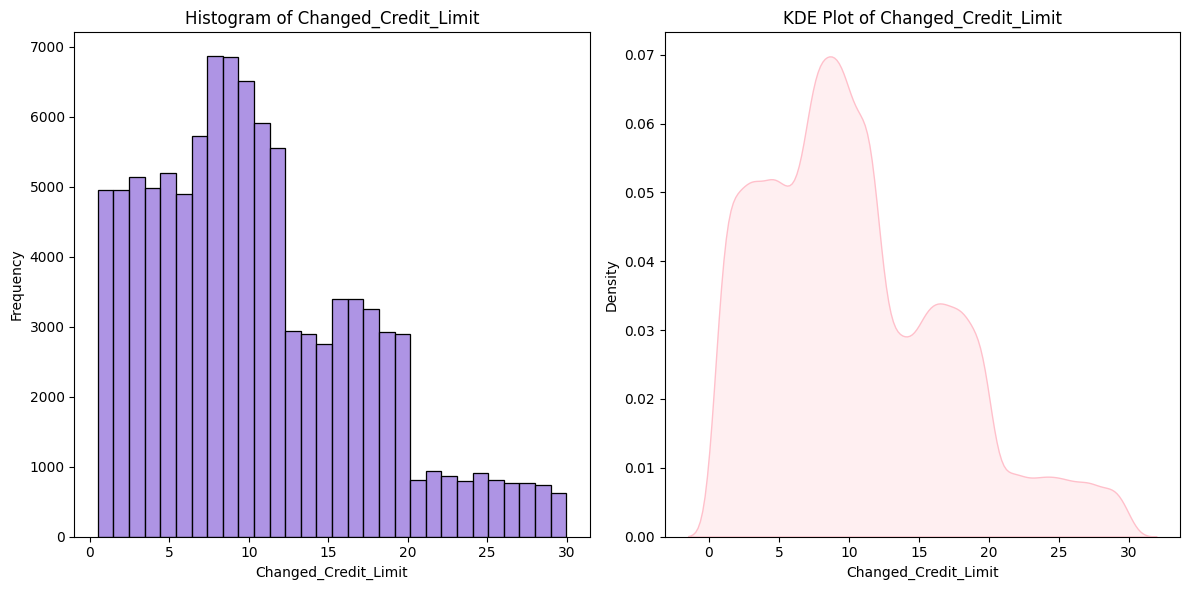

Skewness of Num_Credit_Inquiries: 0.41


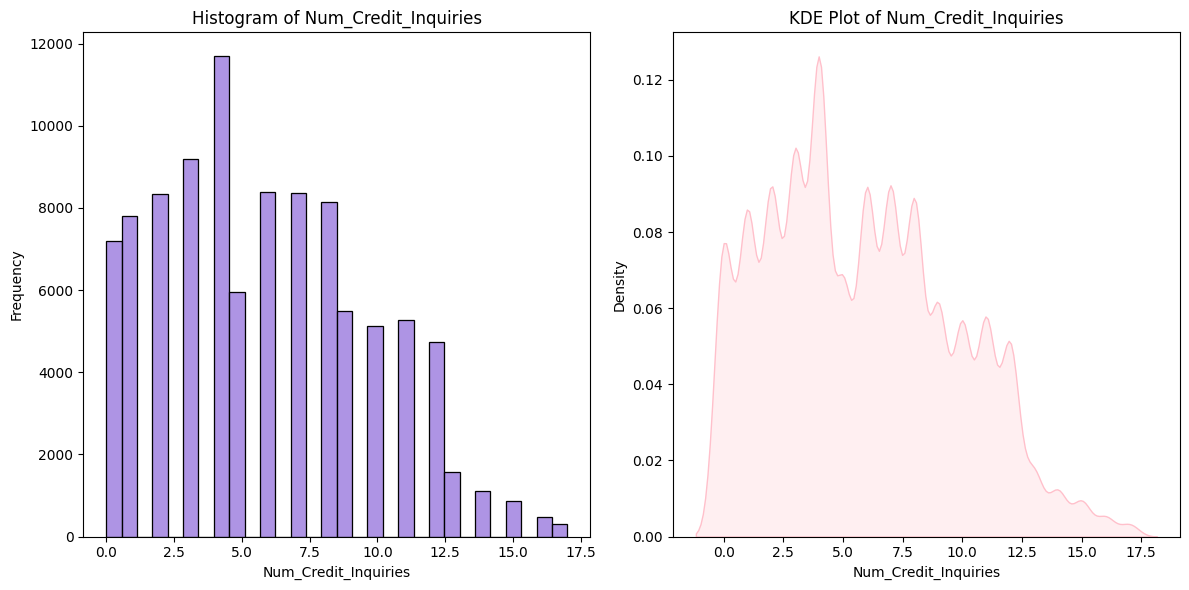

Skewness of Credit_History_Age: -0.05


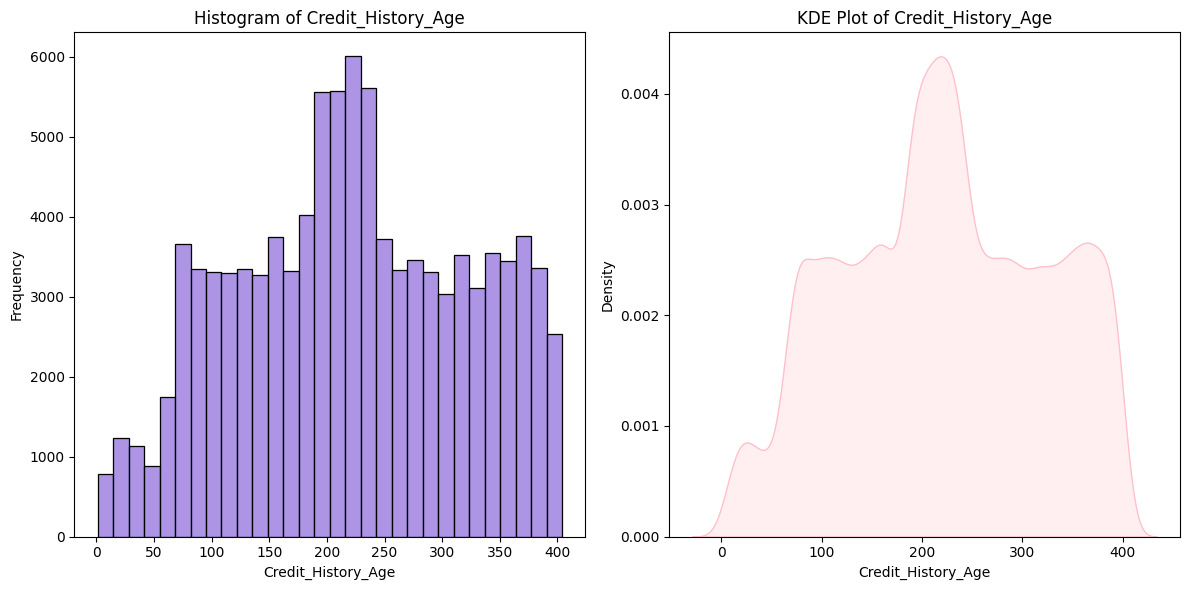

Skewness of Annual_Income: 1.13


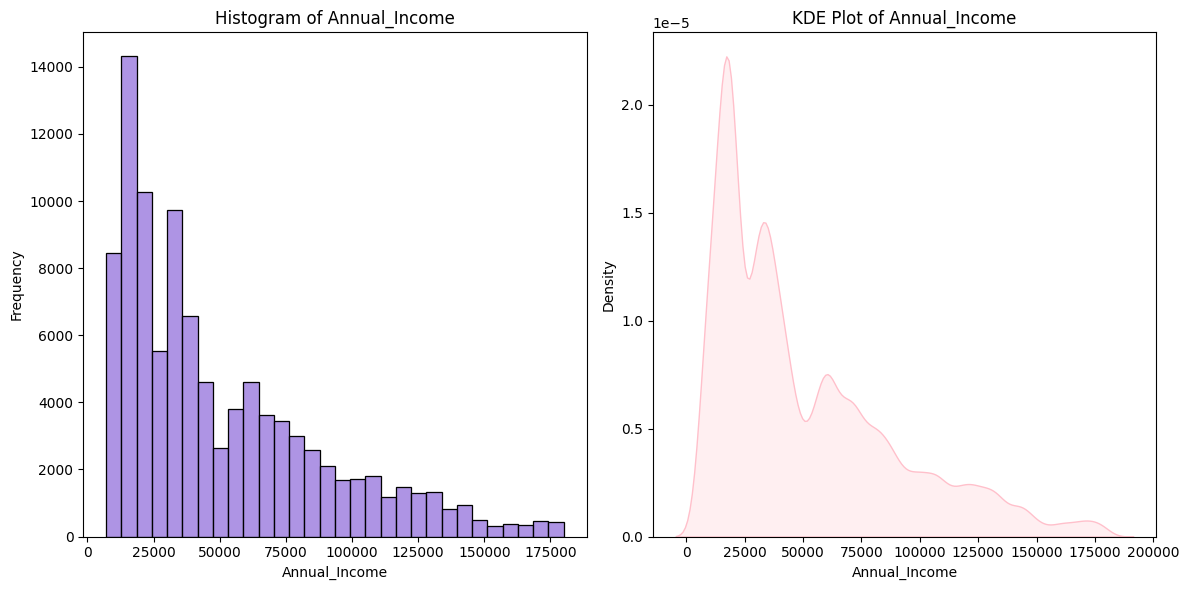

Skewness of Monthly_Inhand_Salary: 1.13


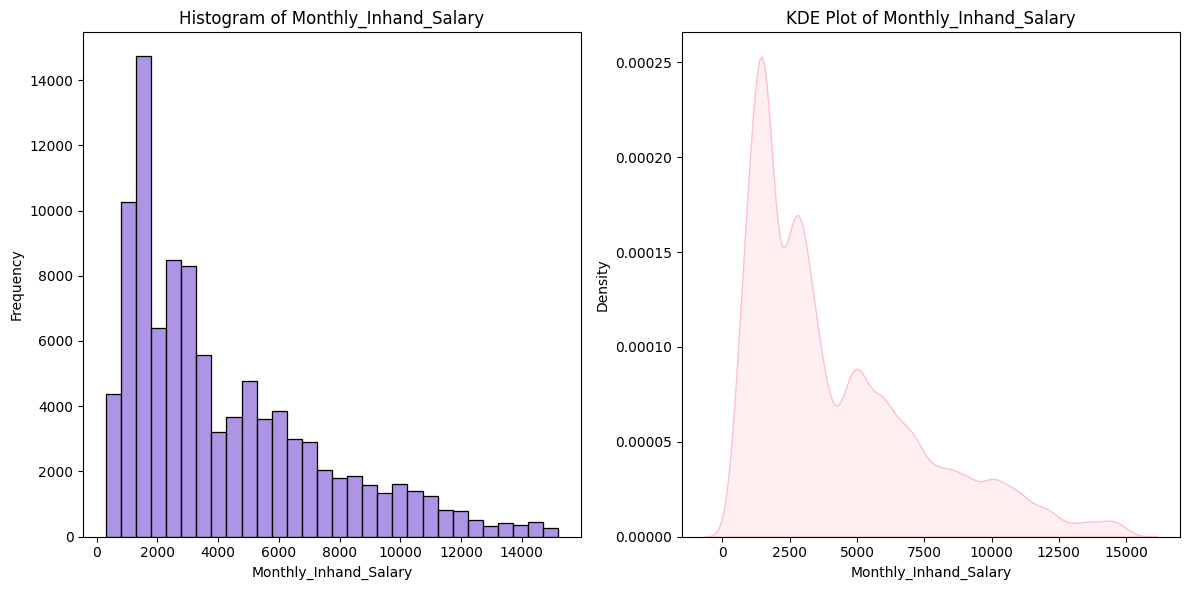

Skewness of Outstanding_Debt: 1.21


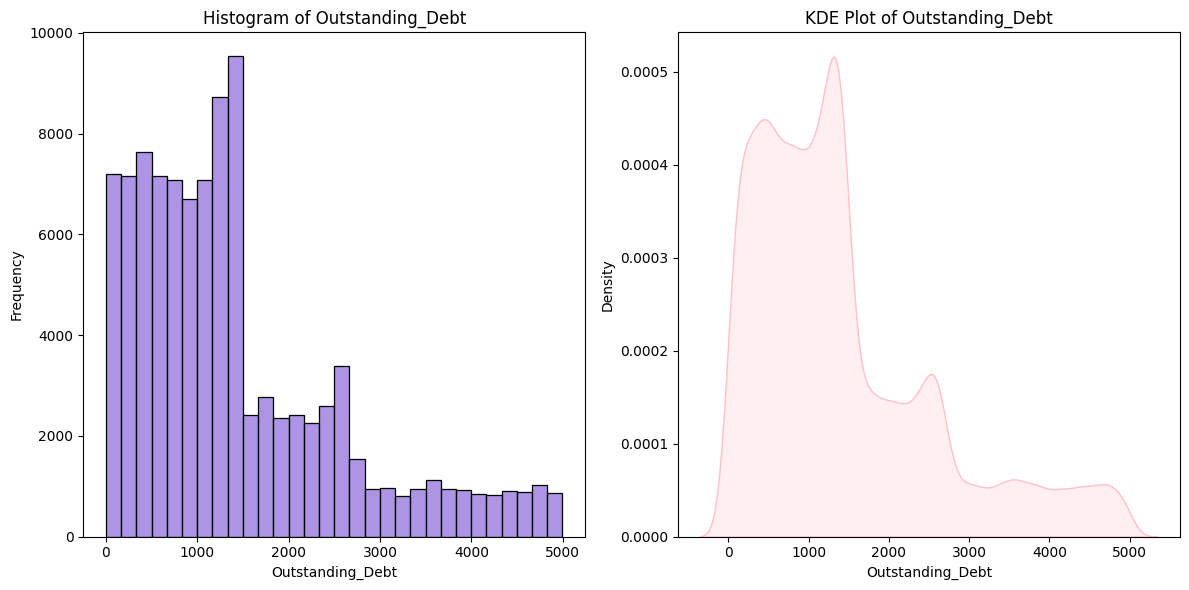

Skewness of Credit_Utilization_Ratio: 0.03


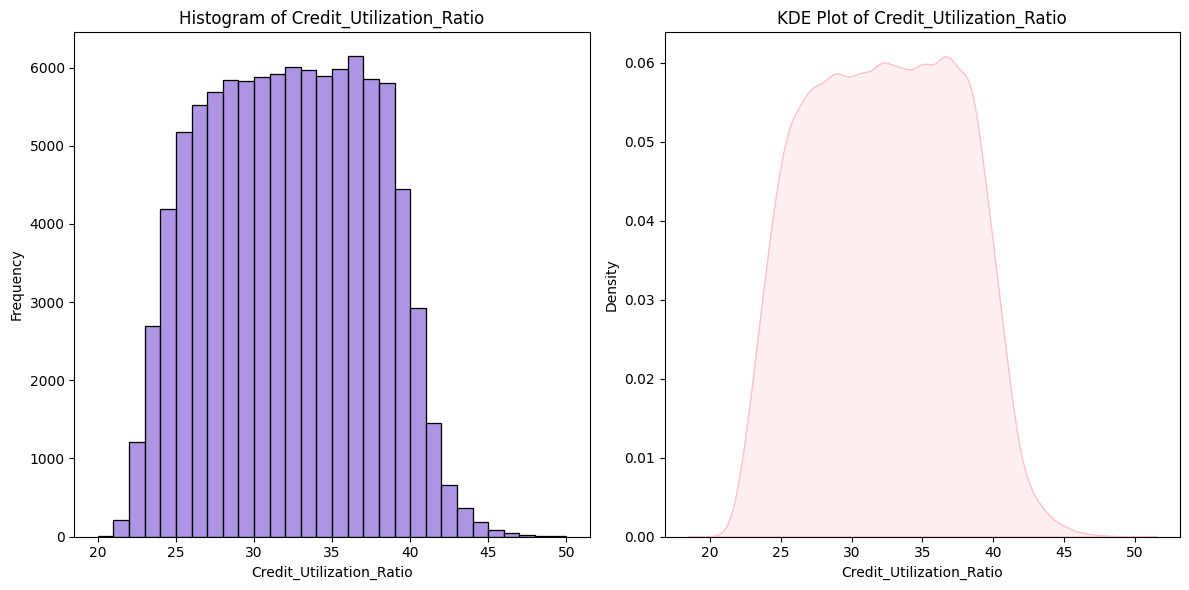

Skewness of Total_EMI_per_month: 4.04


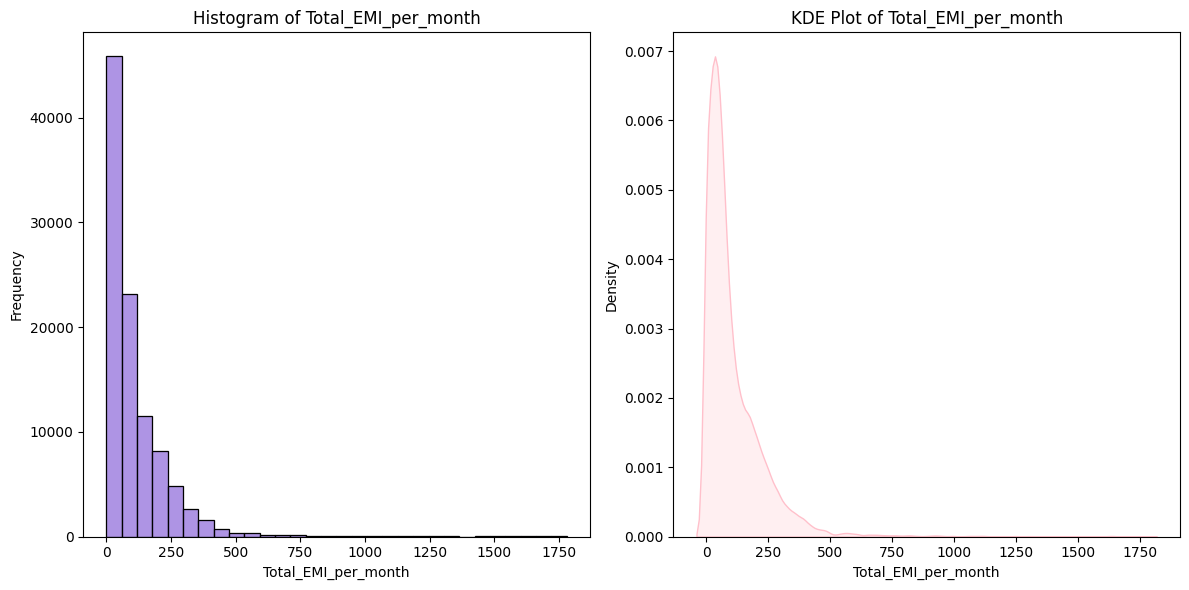

Skewness of Amount_invested_monthly: 1.76


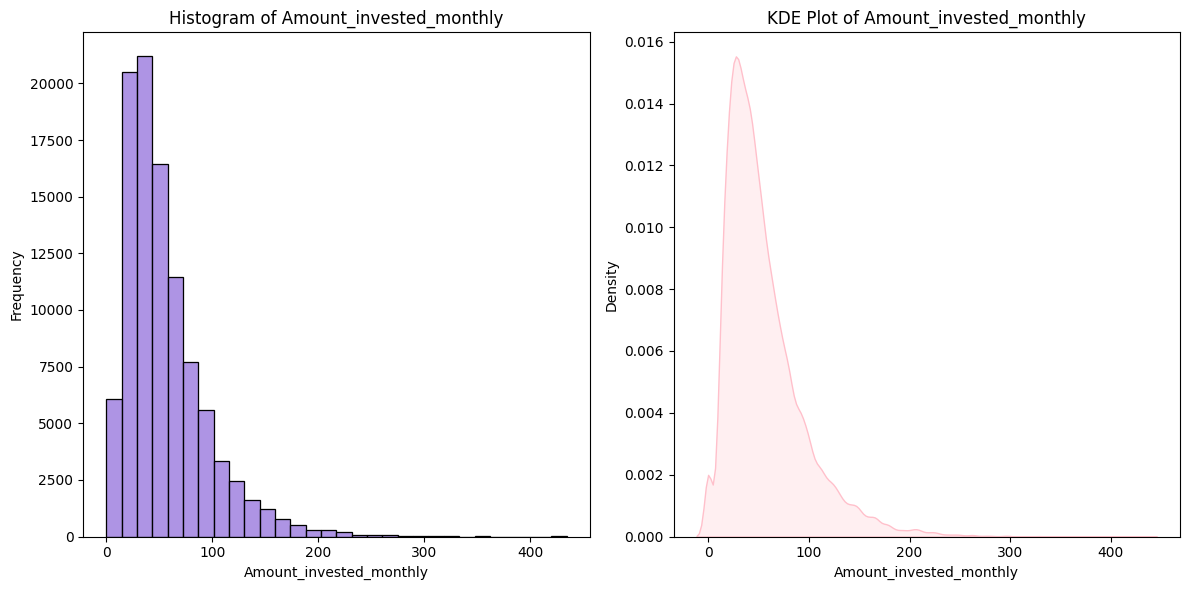

Skewness of Monthly_Balance: 1.36


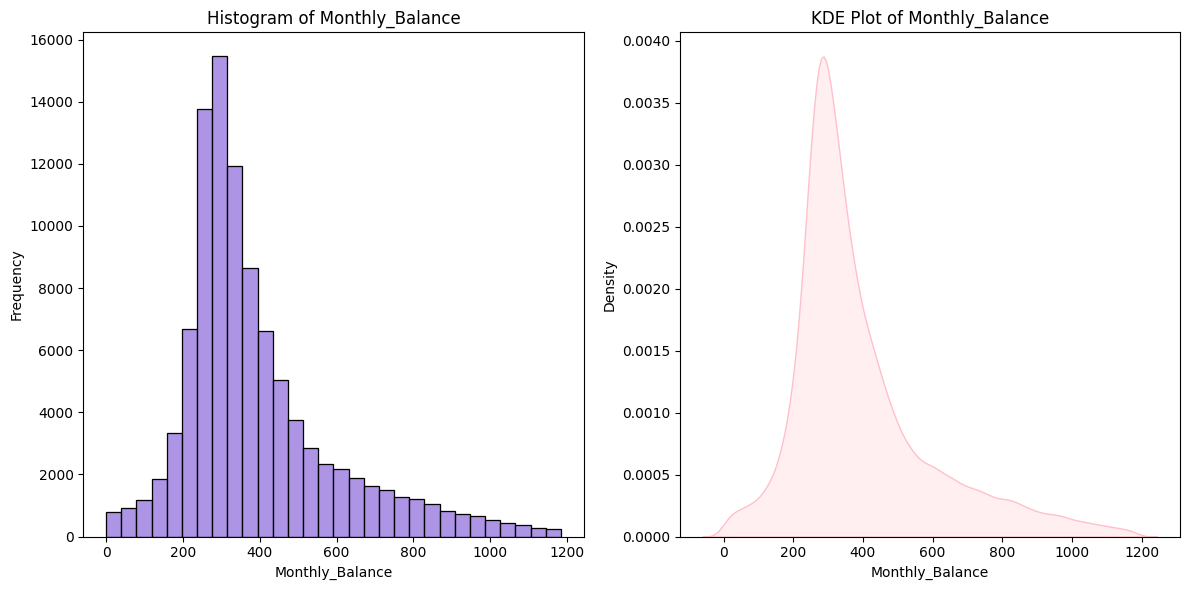

In [195]:
# List of numerical columns
numerical_columns = [
    'Month', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Credit_History_Age',
    'Annual_Income', 'Monthly_Inhand_Salary',
    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance'
]

# Plot histograms, KDE plots, and display skewness
for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Calculate skewness
    col_skewness = skew(data[col].dropna())  # Drop NaNs for skewness calculation

    # Print skewness
    print(f'Skewness of {col}: {col_skewness:.2f}')

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=False, bins=30, color='mediumpurple')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # KDE Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(data[col], fill=True, color='pink')
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

**4.2 Bivariate Analysis**

**Basic Information vs Credit score**

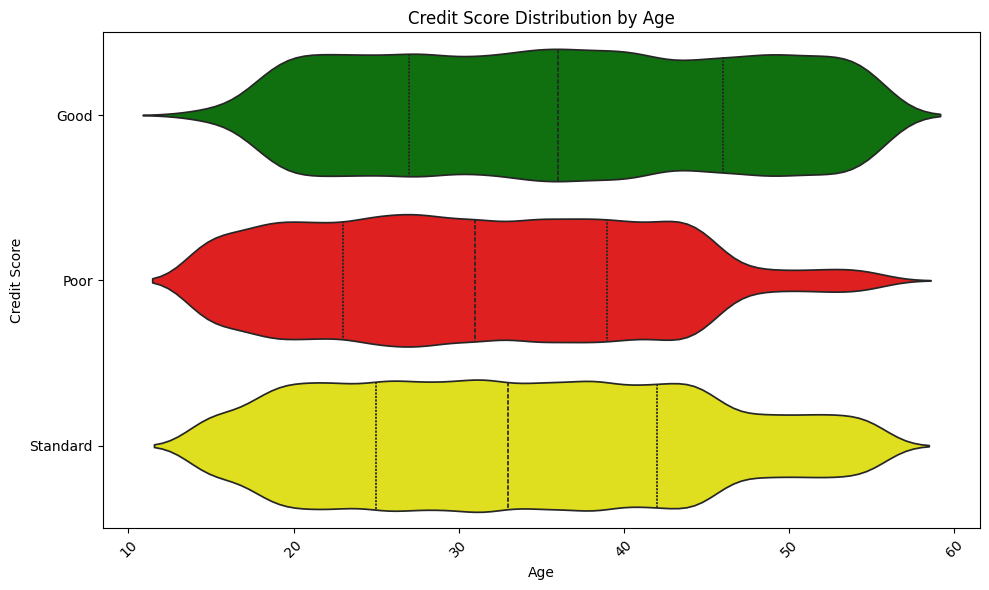

In [196]:
plt.figure(figsize=(10, 6))

# Violin plot of Credit_Score by Age
# Use the dictionary you defined as 'palette' directly
sns.violinplot(x='Age', y='Credit_Score', data=data, palette=palette, inner='quartile')

plt.title('Credit Score Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Credit Score')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"Good" credit score are spread across different ages, with a noticeable concentration around the 30-40 age range."Poor" credit score are also distributed across different ages but with a slight concentration around the 20-30 age range."Standard" credit score are mostly found in the age range of around 30-40

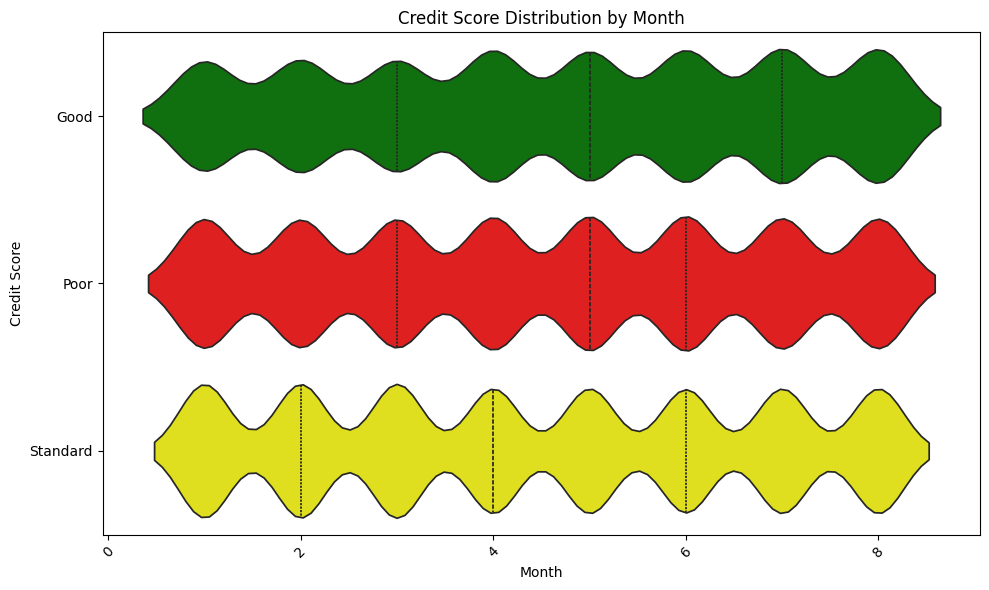

In [197]:
plt.figure(figsize=(10, 6))

# Violin plot of Credit_Score by Month
sns.violinplot(x='Month', y='Credit_Score', data=data, palette=palette, inner='quartile')

plt.title('Credit Score Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Credit Score')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The distribution of good credit scores is relatively consistent across the months.
There are slight variations, but no significant peaks or troughs indicating strong seasonality.

** Financial details vs credit score**

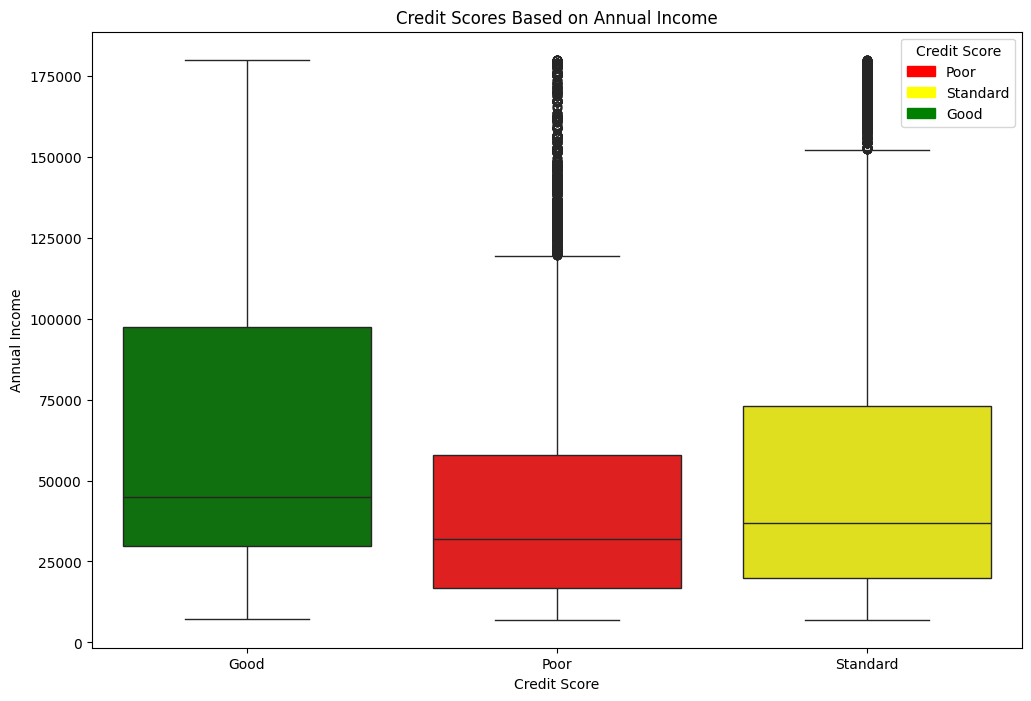

In [198]:
# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=data, hue='Credit_Score', dodge=False, palette=palette)

# Customize the plot
plt.title('Credit Scores Based on Annual Income')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')

legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
plt.legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()


Annual income and credit scores are directly propotional ,more you earn better the scores.

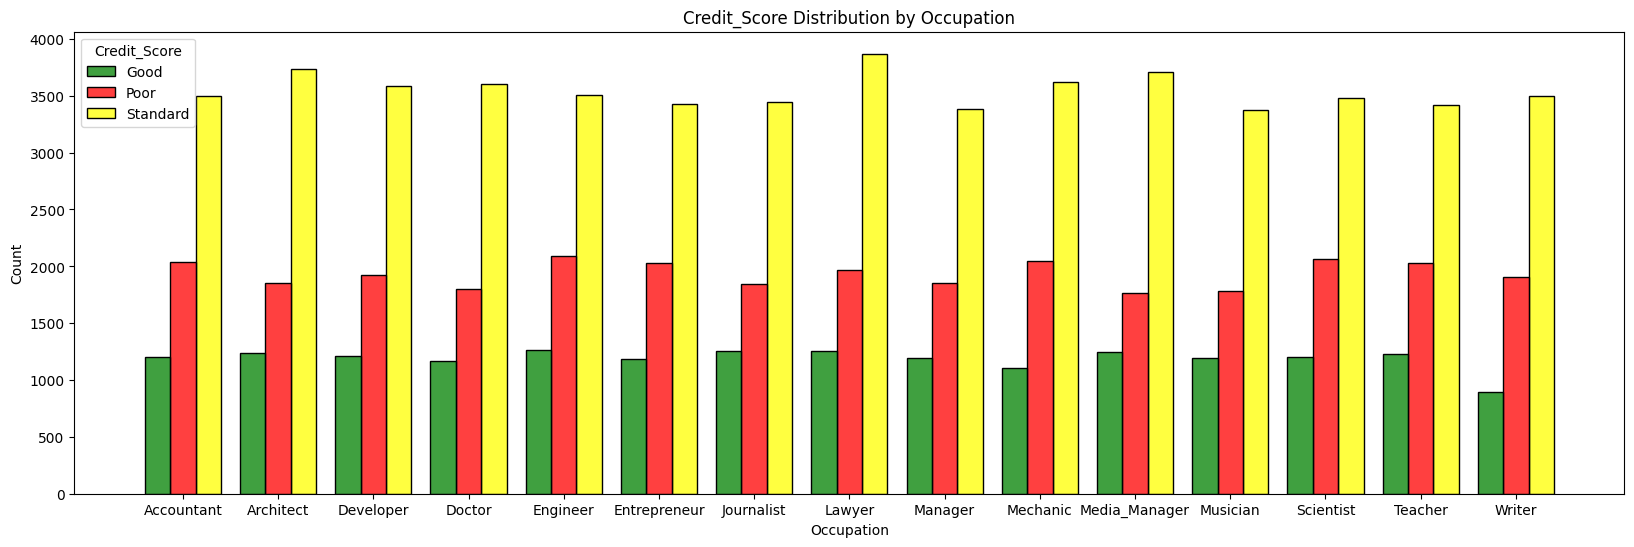

In [130]:
# Set custom figure dimensions
plt.figure(figsize=(20, 6))

# Create the histogram plot with customized colors and dimensions
sns.histplot(data=data, x="Occupation", hue="Credit_Score", multiple="dodge", shrink=.8, palette=palette)

# Customize other plot properties like titles, labels, etc.
plt.title("Credit_Score Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")

# Display the plot
plt.show()

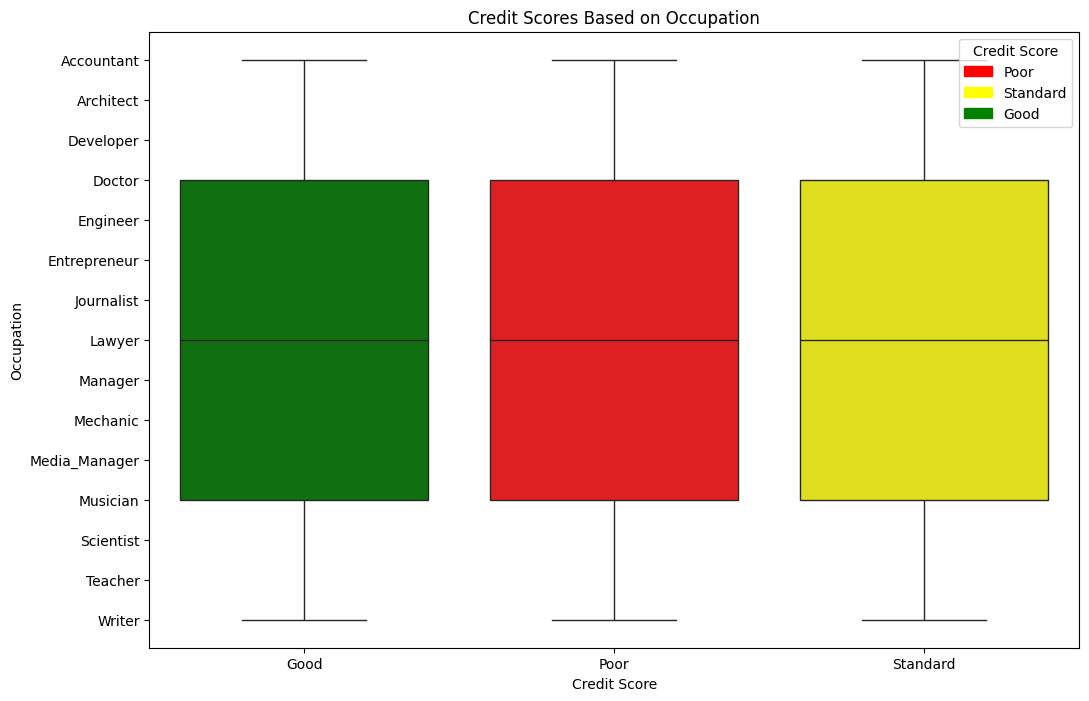

In [131]:
# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Occupation', data=data, hue='Credit_Score', dodge=False, palette=palette)

# Customize the plot
plt.title('Credit Scores Based on Occupation')
plt.xlabel('Credit Score')
plt.ylabel('Occupation')

legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
plt.legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()

There’s not much difference in the credit scores of all occupations mentioned in the data.

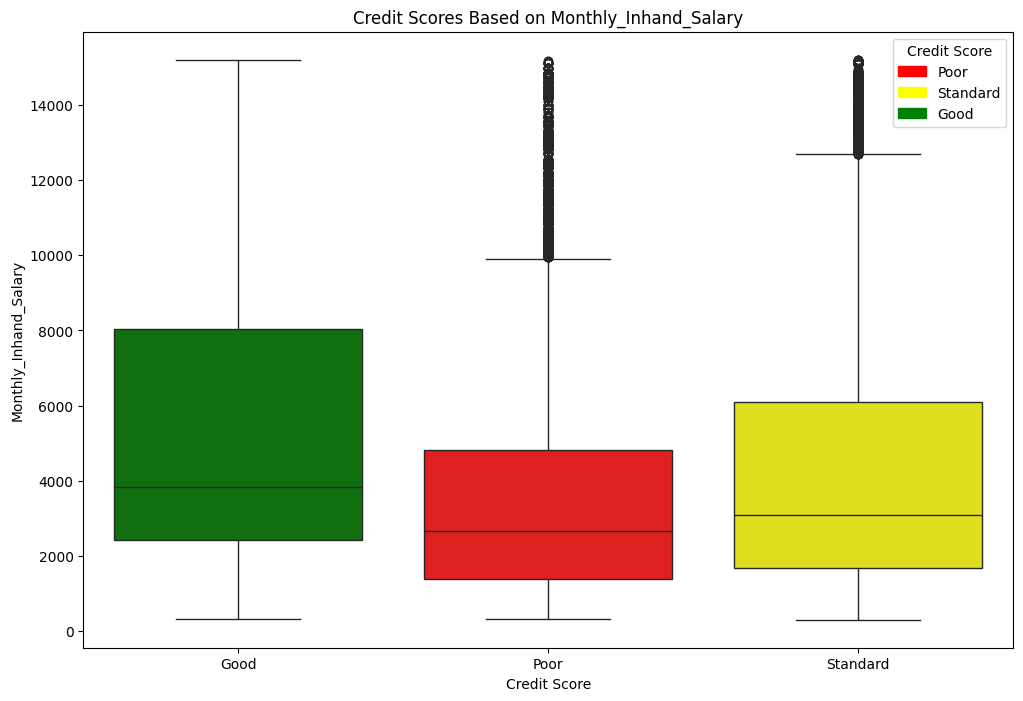

In [132]:
# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=data, hue='Credit_Score', dodge=False, palette=palette)

# Customize the plot
plt.title('Credit Scores Based on Monthly_Inhand_Salary')
plt.xlabel('Credit Score')
plt.ylabel('Monthly_Inhand_Salary')

legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
plt.legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()

Monthly inhand and credit scores are directly propotional ,more you earn better the scores.

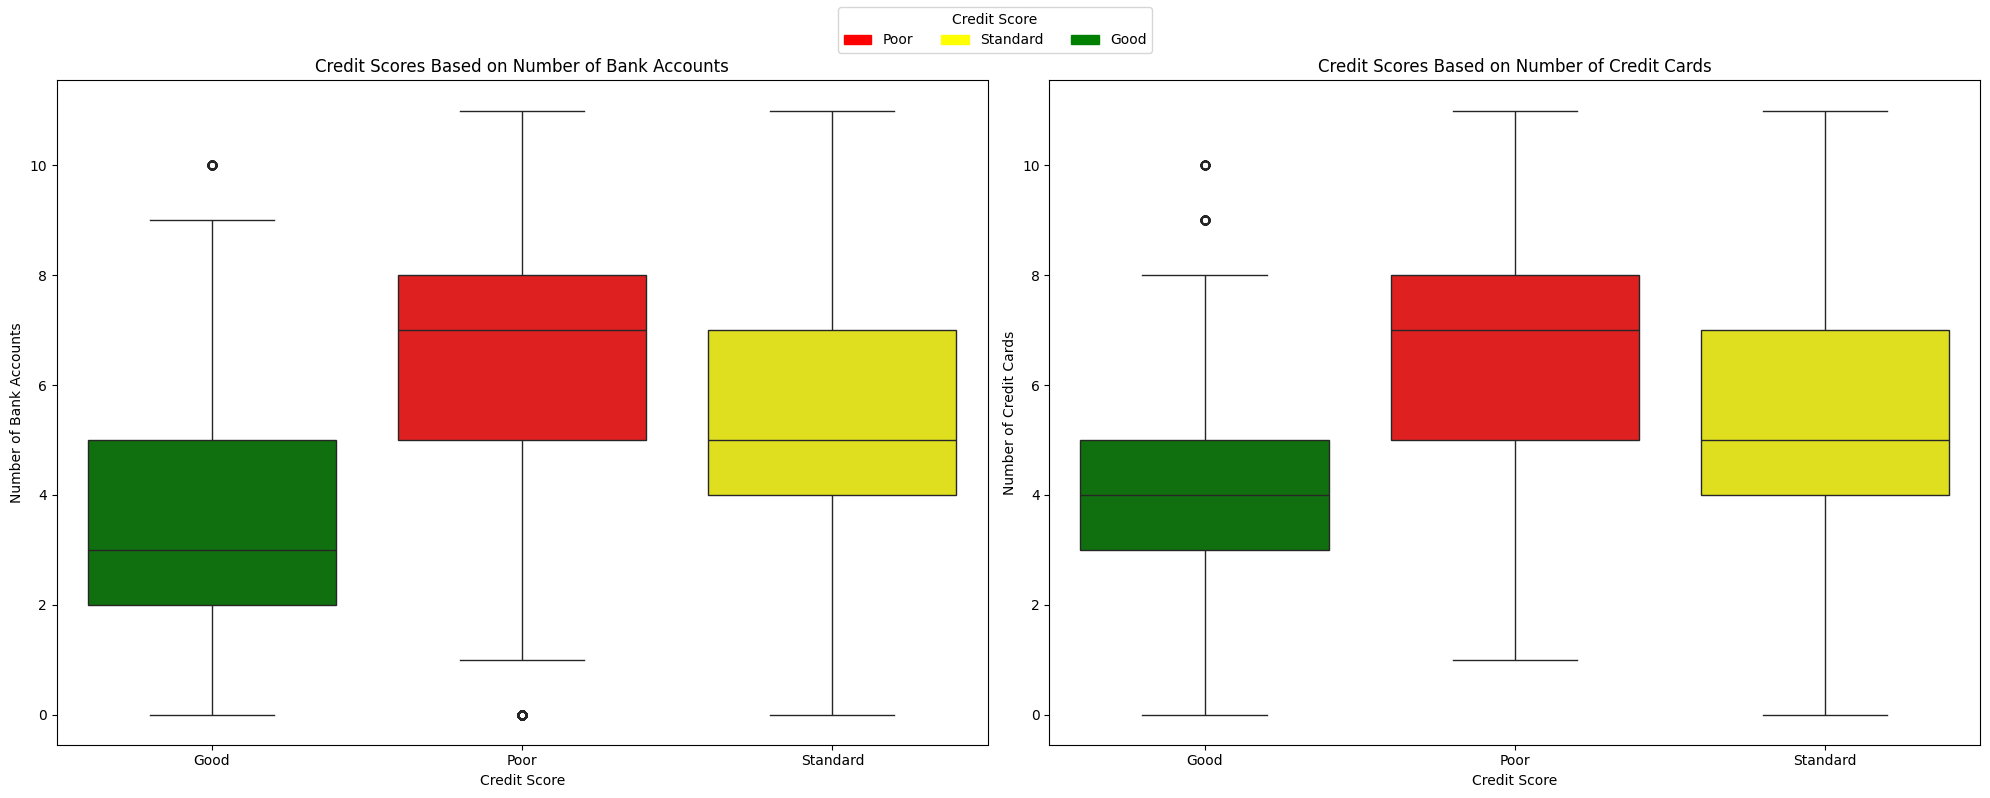

In [133]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot 1: Number of Bank Accounts
sns.boxplot(ax=axes[0], x='Credit_Score', y='Num_Bank_Accounts', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0].set_title('Credit Scores Based on Number of Bank Accounts')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Number of Bank Accounts')

# Plot 2: Number of Credit Cards
sns.boxplot(ax=axes[1], x='Credit_Score', y='Num_Credit_Card', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1].set_title('Credit Scores Based on Number of Credit Cards')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Number of Credit Cards')

# Remove individual legends to add a common one
for ax in axes:
    if ax.legend_ is not None:  # Check if legend exists before removing
        ax.legend_.remove()

# Create common legend
handles = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
fig.legend(handles=handles, title='Credit Score', loc='upper center', ncol=len(palette))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # rect argument leaves space for the common legend

# Show the plot
plt.show()

Having 2-4 accounts is good enough, but having 5 or more adversly effect credit score.Similar to the number of bank accounts, having more credit cards will not positively impact your credit scores. Having 3 – 5 credit cards is good for your credit score.

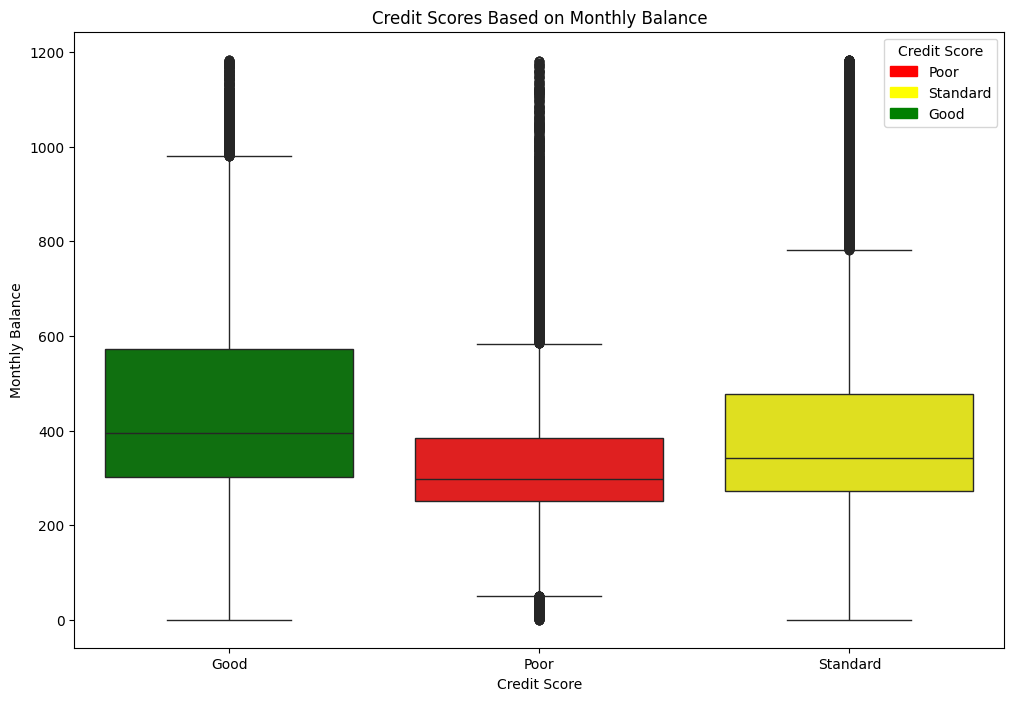

In [134]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=data, hue='Credit_Score', dodge=False, palette=palette)

# Customize the plot
plt.title('Credit Scores Based on Monthly Balance')
plt.xlabel('Credit Score')
plt.ylabel('Monthly Balance')

# Create legend labels
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
plt.legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()


 **Loan and credit details vs credit score**

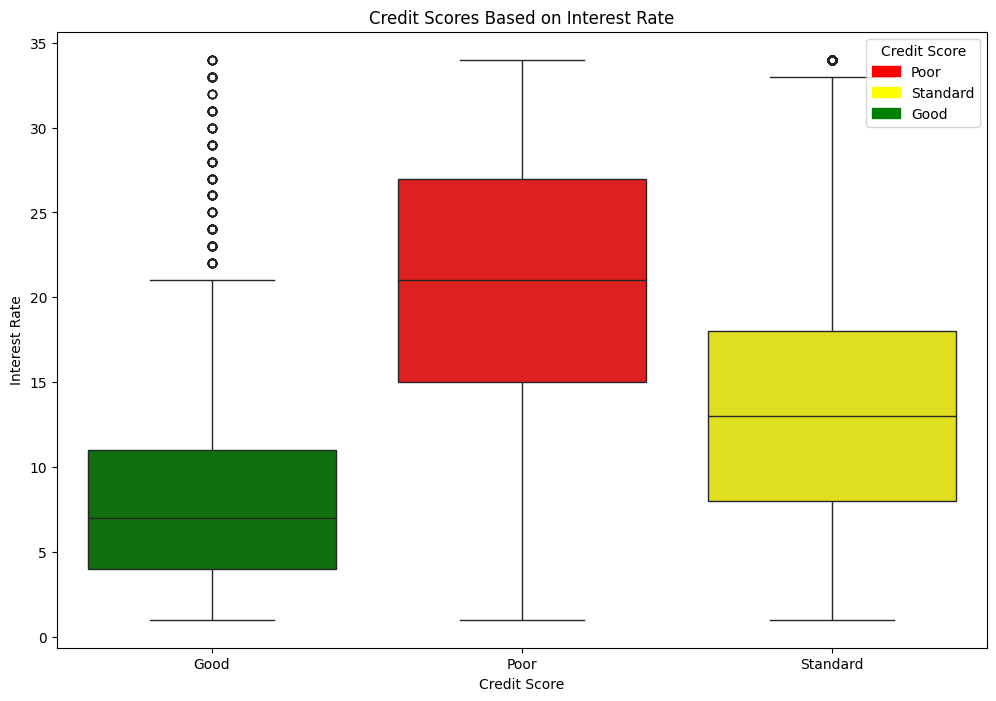

In [135]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=data, hue='Credit_Score', dodge=False, palette=palette)

# Customize the plot
plt.title('Credit Scores Based on Interest Rate')
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')

# Create legend labels
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
plt.legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()


If the average interest rate is 4 – 11%, the credit score is good. Having an average interest rate of more than 15% is bad for your credit scores.

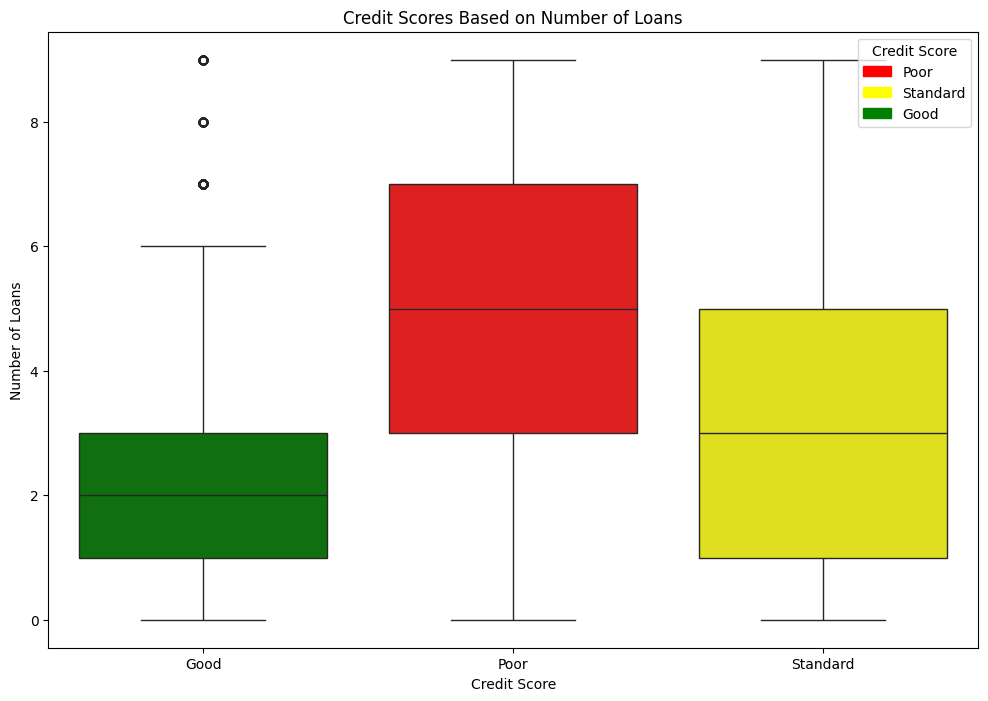

In [136]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=data, hue='Credit_Score', dodge=False, palette=palette)

# Customize the plot
plt.title('Credit Scores Based on Number of Loans')
plt.xlabel('Credit Score')
plt.ylabel('Number of Loans')

# Create legend labels
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
plt.legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()


To have a good credit score, you should not take more than 1 – 3 loans at a time. Having more than three loans at a time will negatively impact your credit scores.

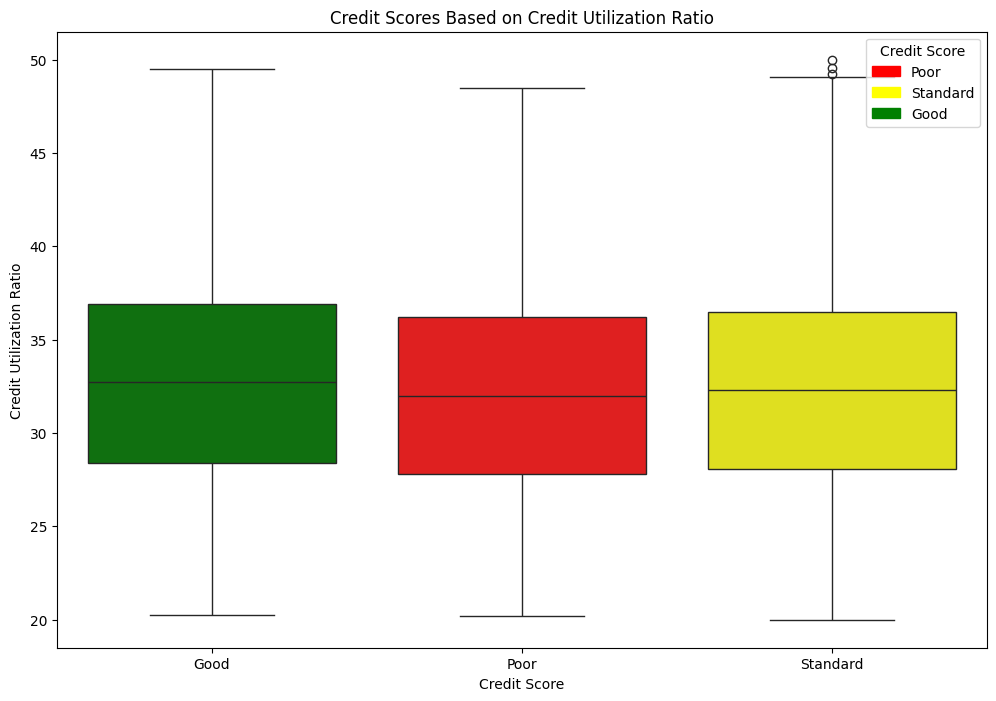

In [137]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=data, hue='Credit_Score', dodge=False, palette=palette)

# Customize the plot
plt.title('Credit Scores Based on Credit Utilization Ratio')
plt.xlabel('Credit Score')
plt.ylabel('Credit Utilization Ratio')

# Create legend labels
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
plt.legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()


Credit utilization ratio means your total debt divided by your total available credit. According to the boxplot,  credit utilization ratio doesn’t affect your credit scores.

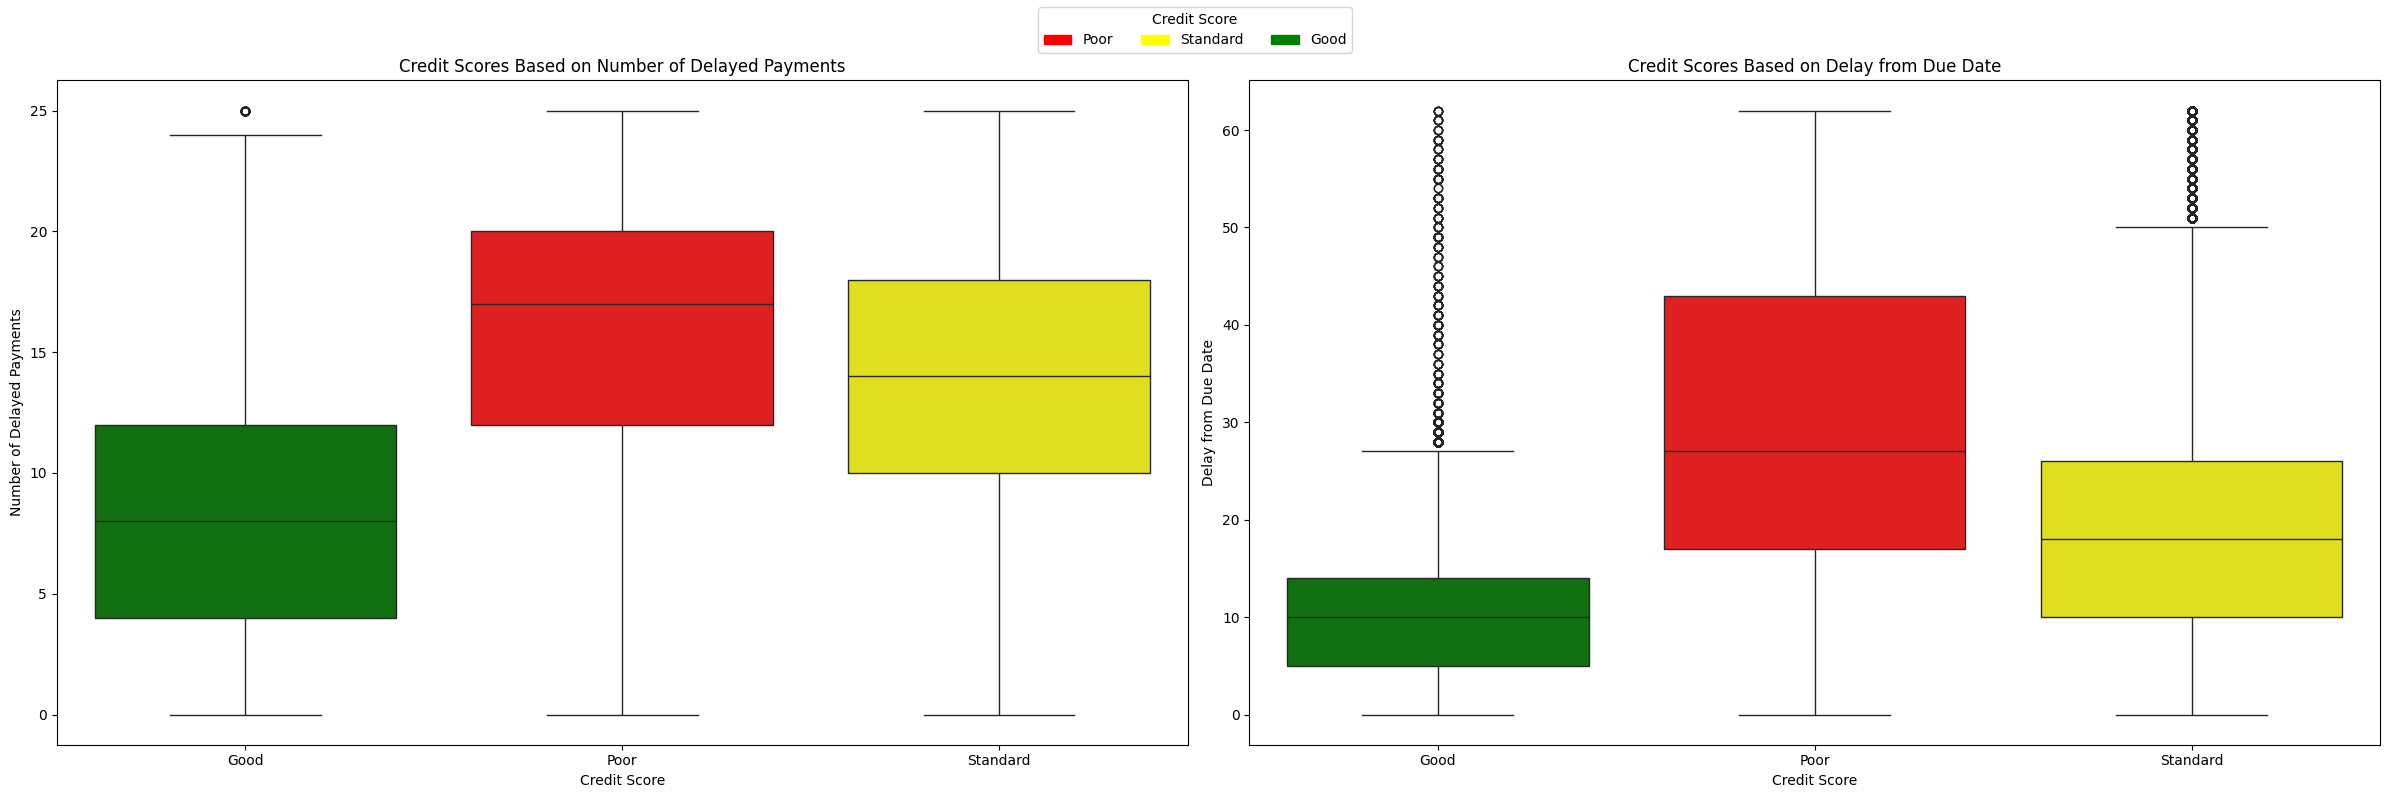

In [138]:
# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Plot 1: Number of Delayed Payments
sns.boxplot(ax=axes[0], x='Credit_Score', y='Num_of_Delayed_Payment', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0].set_title('Credit Scores Based on Number of Delayed Payments')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Number of Delayed Payments')

# Plot 2: Delay from Due Date
sns.boxplot(ax=axes[1], x='Credit_Score', y='Delay_from_due_date', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1].set_title('Credit Scores Based on Delay from Due Date')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Delay from Due Date')

# Create common legend
handles = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
fig.legend(handles=handles, title='Credit Score', loc='upper center', ncol=len(palette))

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # rect argument leaves space for the common legend

# Show the plot
plt.show()

Delaying 4 – 12 payments from the due date will not affect your credit scores. But delaying more than 12 payments from the due date will affect your credit scores negatively.

So you can delay your credit card payment 5 – 14 days from the due date. Delaying your payments for more than 17 days from the due date will impact your credit scores negatively.

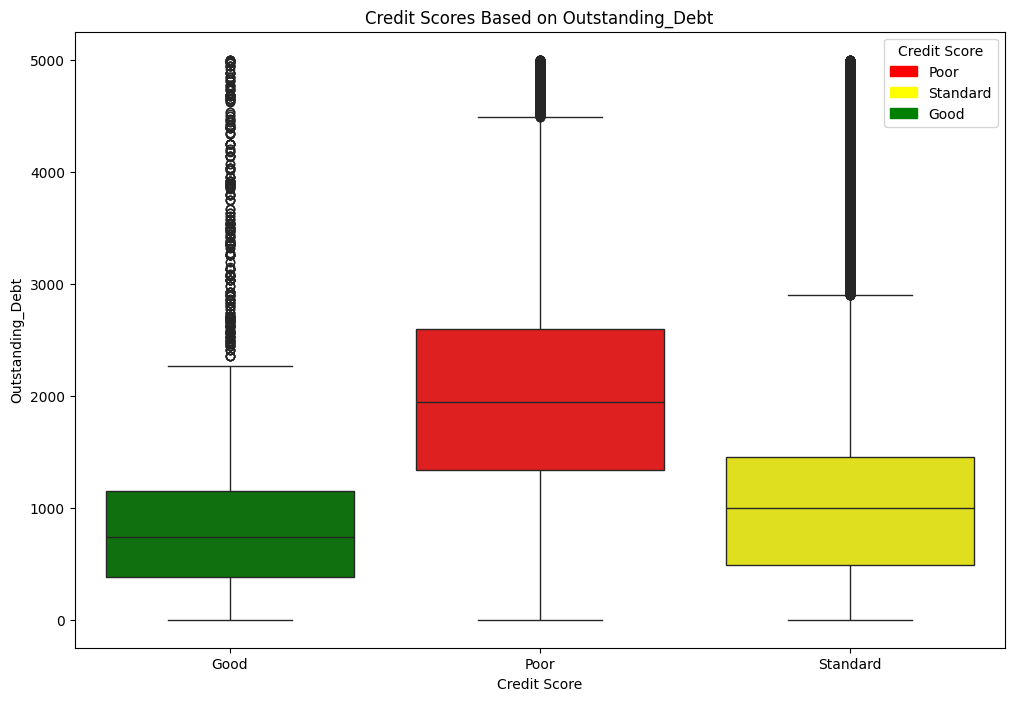

In [139]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=data, hue='Credit_Score', dodge=False, palette=palette)

# Customize the plot
plt.title('Credit Scores Based on Outstanding_Debt')
plt.xlabel('Credit Score')
plt.ylabel('Outstanding_Debt')

# Create legend labels
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
plt.legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()


An outstanding debt of $300  to   $1200 will not affect your credit scores. But always having a debt of more than $1400 will affect your credit scores negatively.

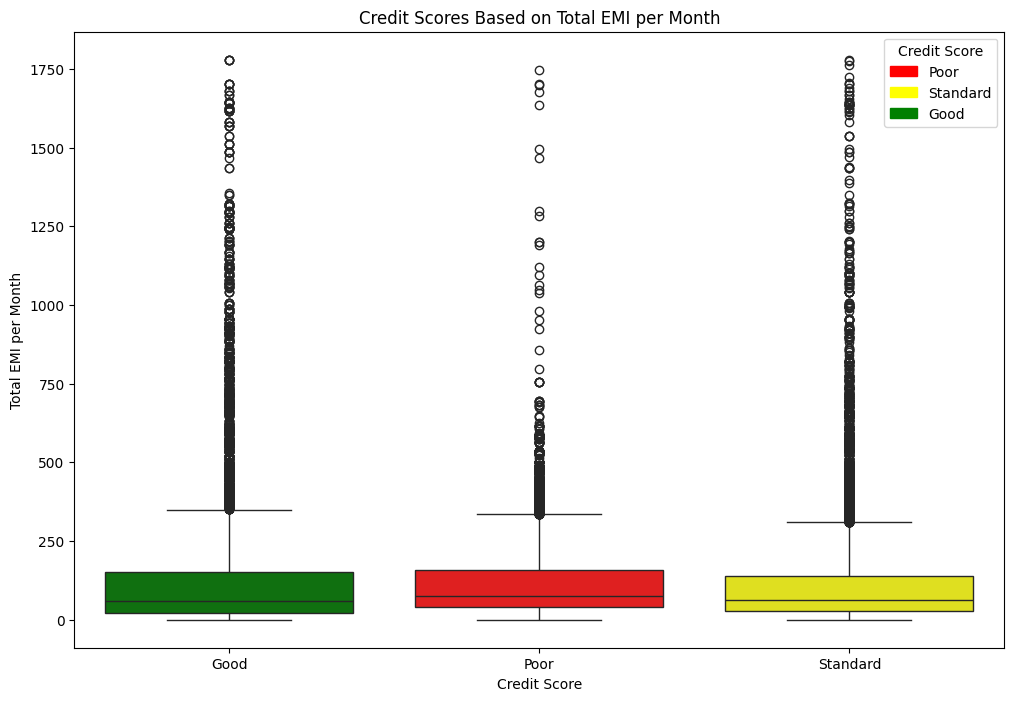

In [140]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=data, hue='Credit_Score', dodge=False, palette=palette)

# Customize the plot
plt.title('Credit Scores Based on Total EMI per Month')
plt.xlabel('Credit Score')
plt.ylabel('Total EMI per Month')

# Create legend labels
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
plt.legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()


The number of EMIs you are paying in a month doesn’t affect much on credit scores.

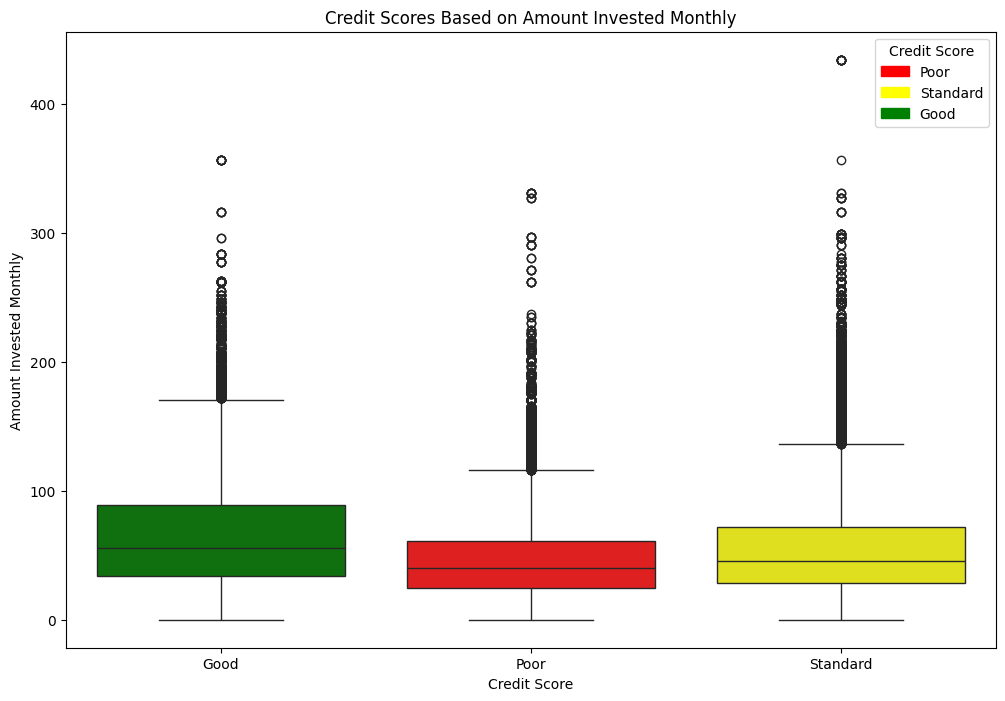

In [141]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=data, hue='Credit_Score', dodge=False, palette=palette)

# Customize the plot
plt.title('Credit Scores Based on Amount Invested Monthly')
plt.xlabel('Credit Score')
plt.ylabel('Amount Invested Monthly')

# Create legend labels
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
plt.legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()


The amount of money you invest monthly doesn’t affect your credit scores a lot

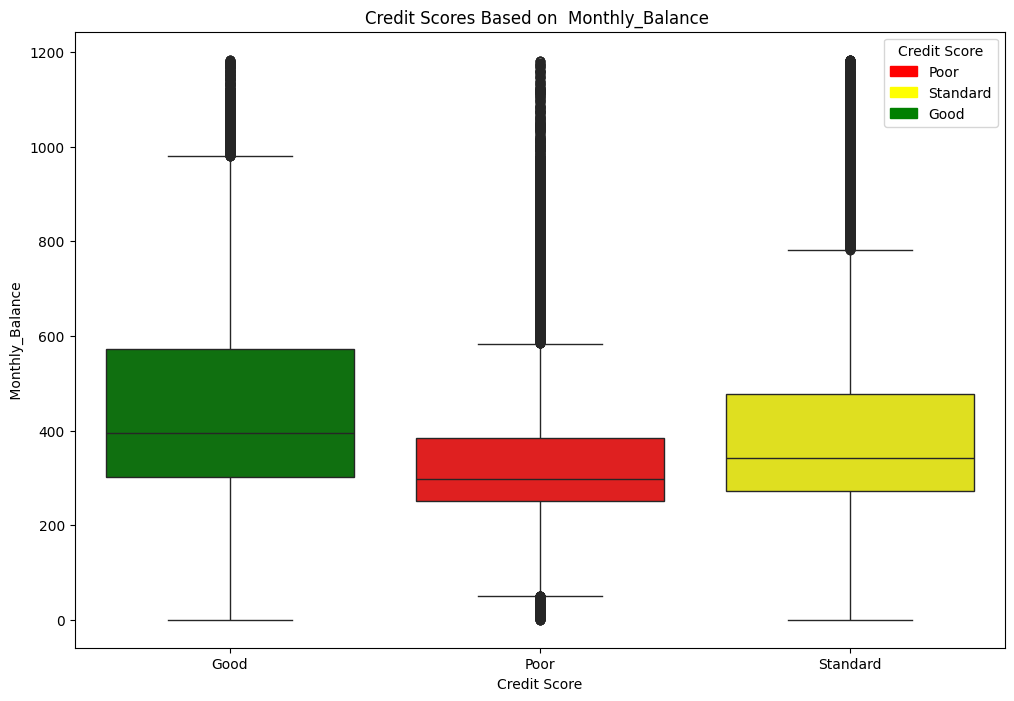

In [142]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=data, hue='Credit_Score', dodge=False, palette=palette)

# Customize the plot
plt.title('Credit Scores Based on  Monthly_Balance ')
plt.xlabel('Credit Score')
plt.ylabel(' Monthly_Balance ')

# Create legend labels
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
plt.legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()


So, having a high monthly balance in your account at the end of the month is good for your credit scores. A monthly balance of less than $250 is bad for credit scores.

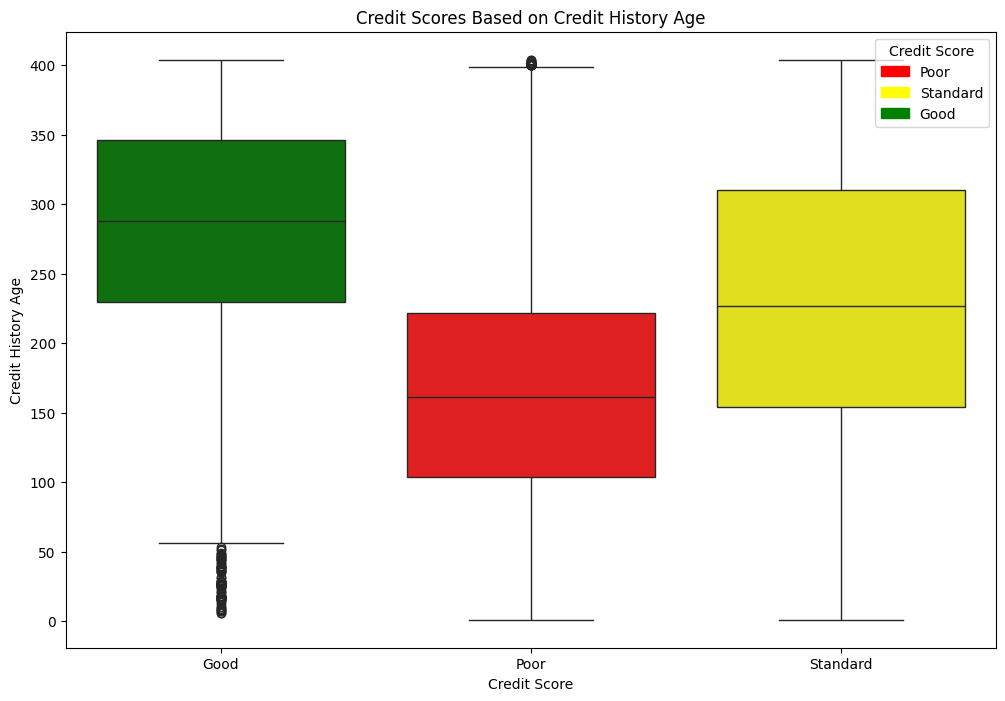

In [143]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=data, hue='Credit_Score', dodge=False, palette=palette)

# Customize the plot
plt.title('Credit Scores Based on Credit History Age')
plt.xlabel('Credit Score')
plt.ylabel('Credit History Age')

# Create legend labels
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
plt.legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()


So, having a long credit history results in better credit scores

Based on analysis,we can drop following columns

In [199]:
# Assuming 'data' is your DataFrame
columns_to_drop = [ 'Month','Occupation', 'Type_of_Loan', 'Payment_of_Min_Amount','Credit_Utilization_Ratio','Total_EMI_per_month']

# Drop columns from the DataFrame
data = data.drop(columns=columns_to_drop)

In [200]:
# Assuming 'data' is your DataFrame
columns_to_drop = ['Color']

# Drop columns from the DataFrame
data = data.drop(columns=columns_to_drop)

**5.DATA TRANSFORMATION**

**5.1 Handle Outliers**

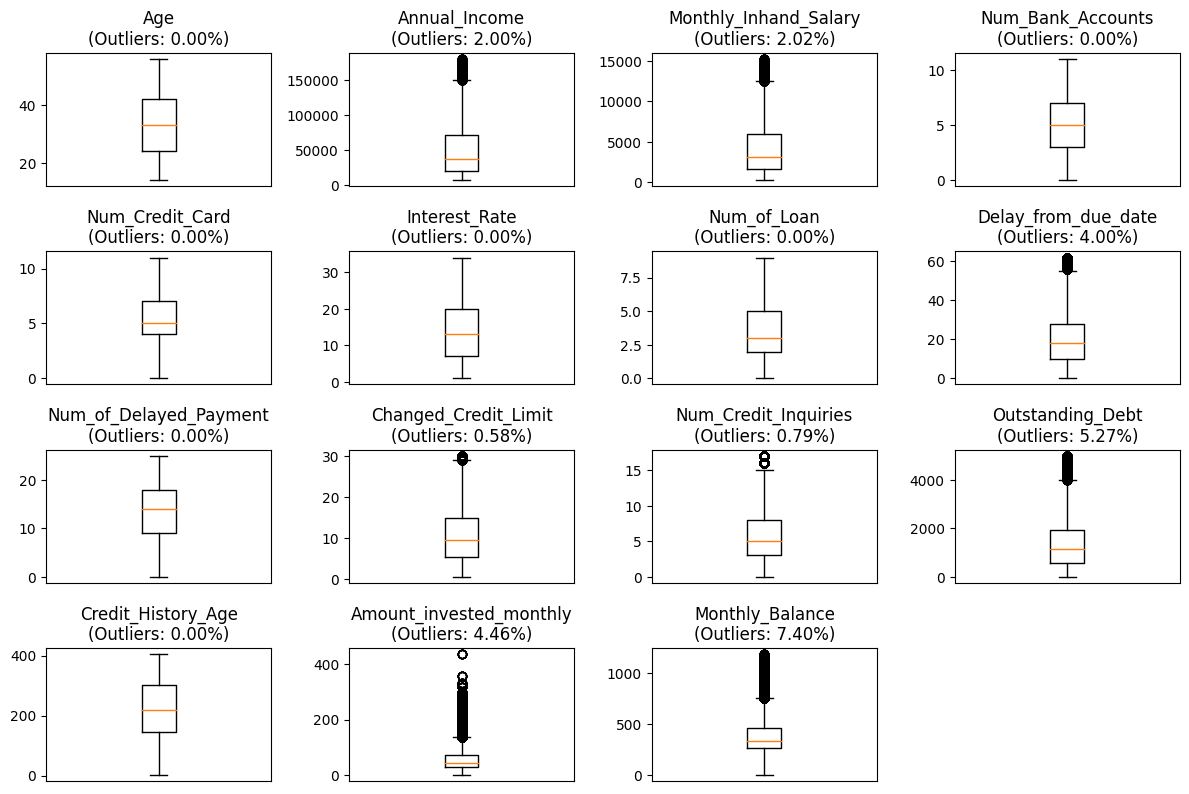

In [201]:
#boxplot before handling outliers
continuous_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt','Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']

outlier_percentages = {}
for col in continuous_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_percentage = ((data[col] < lower_bound) | (data[col] > upper_bound)).mean() * 100
    outlier_percentages[col] = outliers_percentage

# Create subplots for each continuous column
plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_columns, start=1):
    plt.subplot(5, 4, i)
    plt.boxplot(data[col])
    plt.title(f'{col}\n(Outliers: {outlier_percentages[col]:.2f}%)')
    plt.xticks([])

plt.tight_layout()
plt.show()

In [202]:

# Define columns to be clipped
continuous_columns = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt','Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance'
]

# Function to clip using IQR
def clip_using_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.clip(data[column], lower_bound, upper_bound)

# Apply clipping to each column
for col in continuous_columns:
    data[col] = clip_using_iqr(data, col)

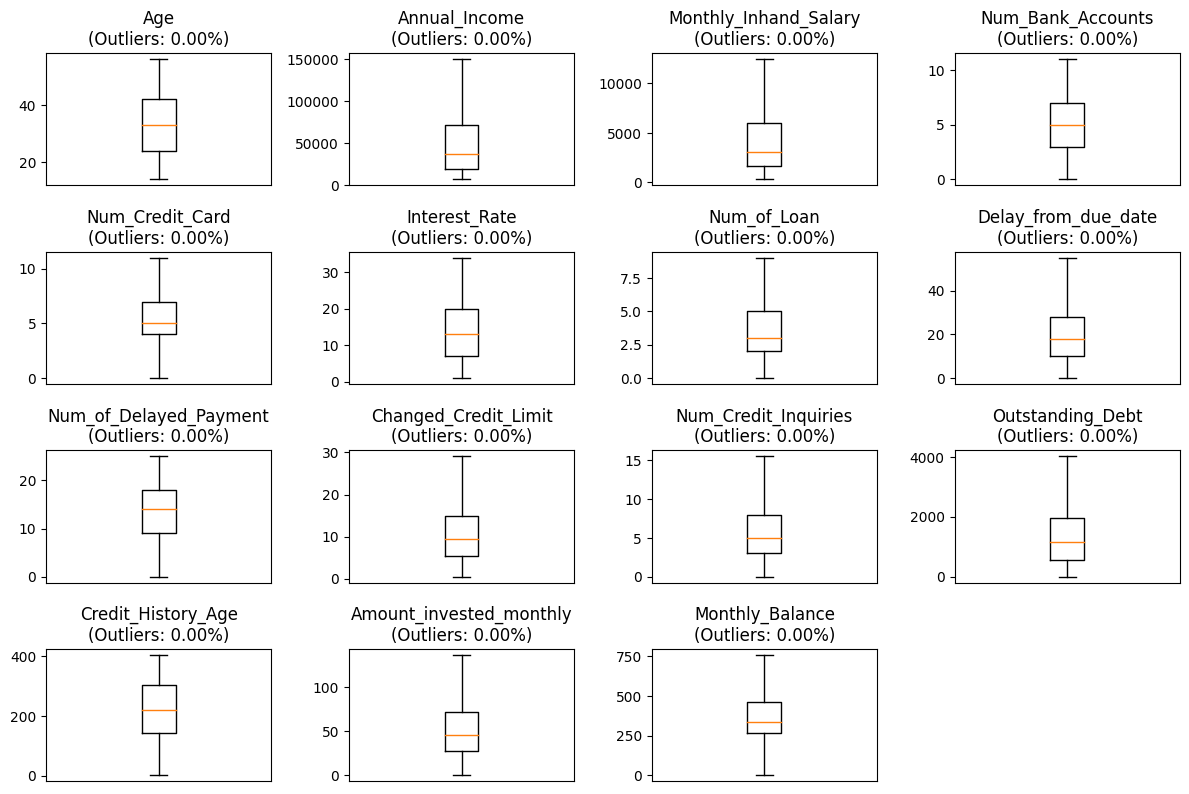

In [203]:
#boxplot after handling outliers
continuous_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt','Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']

outlier_percentages = {}
for col in continuous_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_percentage = ((data[col] < lower_bound) | (data[col] > upper_bound)).mean() * 100
    outlier_percentages[col] = outliers_percentage

# Create subplots for each continuous column
plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_columns, start=1):
    plt.subplot(5, 4, i)
    plt.boxplot(data[col])
    plt.title(f'{col}\n(Outliers: {outlier_percentages[col]:.2f}%)')
    plt.xticks([])

plt.tight_layout()
plt.show()

**5.2 Encoding**

credit_mix and credit_score are ordinal categories, so I'll be replacing their categories with -1, 0, and 1, in order for them .Used mapping for payment behaviour.

In [204]:
# Define the mapping for ordinal categories
credit_mix_mapping = {'Poor': -1, 'Standard': 0, 'Good': 1}
credit_score_mapping = {'Poor': -1, 'Standard': 0, 'Good': 1}

# Apply the mapping to the columns
data['Credit_Mix'] = data['Credit_Mix'].map(credit_mix_mapping)
data['Credit_Score'] = data['Credit_Score'].map(credit_score_mapping)



In [205]:
lables = {
    'Low_spent_Small_value_payments' : 0,
    'Low_spent_Medium_value_payments' : 1,
    'Low_spent_Large_value_payments' : 2,
    'High_spent_Small_value_payments' : 3,
    'High_spent_Medium_value_payments' : 4,
    'High_spent_Large_value_payments' : 5
    }

data['Payment_Behaviour'] = data['Payment_Behaviour'].map(lables)
data['Payment_Behaviour'] = data['Payment_Behaviour'].astype("int64")

**5.3 Removing Highly correlated datas**

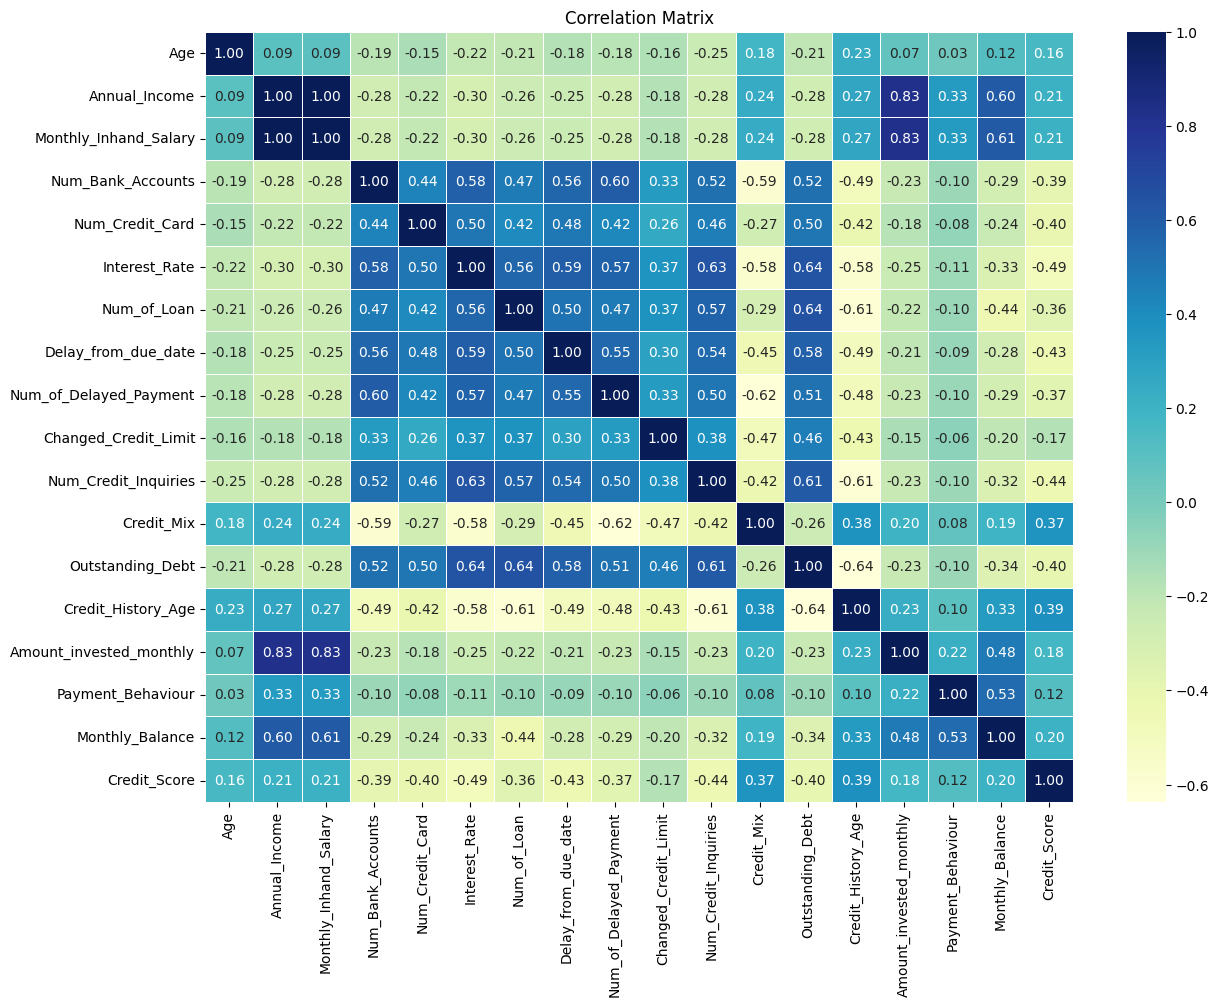

In [206]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [207]:
# Define the correlation threshold
correlation_threshold = 0.75

# Filter the correlation matrix to include only highly correlated pairs
highly_correlated = correlation_matrix[(correlation_matrix > correlation_threshold) & (correlation_matrix < 1)]

# Print highly correlated data
print("Highly Correlated Data:")
for col in highly_correlated:
    correlated_vars = highly_correlated[col][highly_correlated[col].notnull()]
    for idx, val in correlated_vars.items():
      print(f"{col} and {idx}: {val:.2f}")

Highly Correlated Data:
Annual_Income and Monthly_Inhand_Salary: 1.00
Annual_Income and Amount_invested_monthly: 0.83
Monthly_Inhand_Salary and Annual_Income: 1.00
Monthly_Inhand_Salary and Amount_invested_monthly: 0.83
Amount_invested_monthly and Annual_Income: 0.83
Amount_invested_monthly and Monthly_Inhand_Salary: 0.83


We can drop one of the highly correlated columns from each pair to avoid redundancy

In [208]:
# List of columns to drop
columns_to_drop = ['Monthly_Inhand_Salary', 'Amount_invested_monthly']

# Check if columns exist in the DataFrame
print("Columns before dropping:", data.columns.tolist())

# Drop the columns and save the result back to the 'data' DataFrame
data = data.drop(columns=columns_to_drop)

# Verify the columns have been dropped
print(f"Columns dropped: {columns_to_drop}")
print("Remaining columns:", data.columns.tolist())

Columns before dropping: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']
Columns dropped: ['Monthly_Inhand_Salary', 'Amount_invested_monthly']
Remaining columns: ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


**5.4 Scaling**

In [171]:
# List of continuous columns to scale
continuous_columns = [
    'Age', 'Annual_Income', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Outstanding_Debt', 'Credit_History_Age', 'Monthly_Balance'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the continuous columns
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

# Display the first few rows of the scaled DataFrame
print("Scaled DataFrame:")
print(data.head())

Scaled DataFrame:
        Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0 -0.958344      -0.831416          -0.913438        -0.741899      -1.319266   
1 -0.958344      -0.831416          -0.913438        -0.741899      -1.319266   
2 -0.958344      -0.831416          -0.913438        -0.741899      -1.319266   
3 -0.958344      -0.831416          -0.913438        -0.741899      -1.319266   
4 -0.958344      -0.831416          -0.913438        -0.741899      -1.319266   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0     0.190946            -1.244692               -1.012183   
1     0.190946            -1.244692               -1.493173   
2     0.190946            -1.244692               -1.012183   
3     0.190946            -1.105761               -1.493173   
4     0.190946            -1.036295               -1.493173   

   Changed_Credit_Limit  Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0              0.121563             -

**6.Data Splitting**

In [174]:

#  Separate features and target variable
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']

#  Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training data into training and validation sets (70-30 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Print the shapes to verify the splits
print("Training set:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print("\nValidation set:")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print("\nTesting set:")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Training set:
X_train shape: (56000, 15), y_train shape: (56000,)

Validation set:
X_val shape: (24000, 15), y_val shape: (24000,)

Testing set:
X_test shape: (20000, 15), y_test shape: (20000,)
